In [24]:
from google.colab import files
uploaded = files.upload()

Saving BLS-T7.xlsx to BLS-T7 (1).xlsx


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_excel('BLS-T7.xlsx', na_values='-')
# Print basic summary statistics for each variable
print(df.describe())




       Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  ReceivedPay  \
count       962.000000       962.000000         962.000000   936.000000   
mean      19667.382536       552.650728           3.184615    88.706197   
std       33275.424346       982.686813           2.667891   173.499169   
min         524.000000         1.000000           0.100000     0.000000   
25%        4737.500000        93.250000           1.500000    16.000000   
50%        9078.500000       232.500000           2.300000    35.000000   
75%       16436.250000       526.750000           3.900000    74.000000   
max      155797.000000      8253.000000          17.900000  1408.000000   

       NotReceivedPay  TotalUnableToWork  ReceivedPay.1  NotReceivedPay.1  
count      960.000000              962.0     767.000000        769.000000  
mean       467.322917              100.0      16.266754         83.775423  
std        826.828690                0.0       9.627774          9.651087  
min          1.00000

In [30]:
# Check for missing values in each variable
print(df.isnull().sum())



Characteristic         0
Total Civilian         0
TotalEmpLaidOff        0
PercentEmpLaidOff      0
ReceivedPay           26
NotReceivedPay         2
TotalUnableToWork      0
ReceivedPay.1        195
NotReceivedPay.1     193
Month                  0
dtype: int64


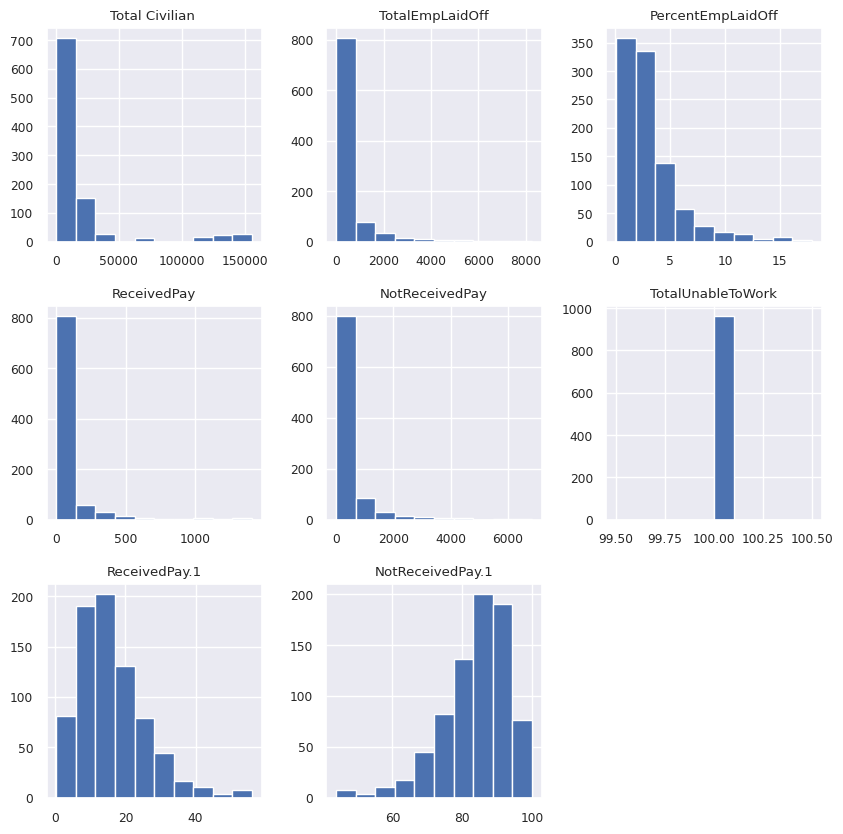

In [31]:
#histogram of each variable's distribution
df.hist(figsize=(10,10))
plt.show()



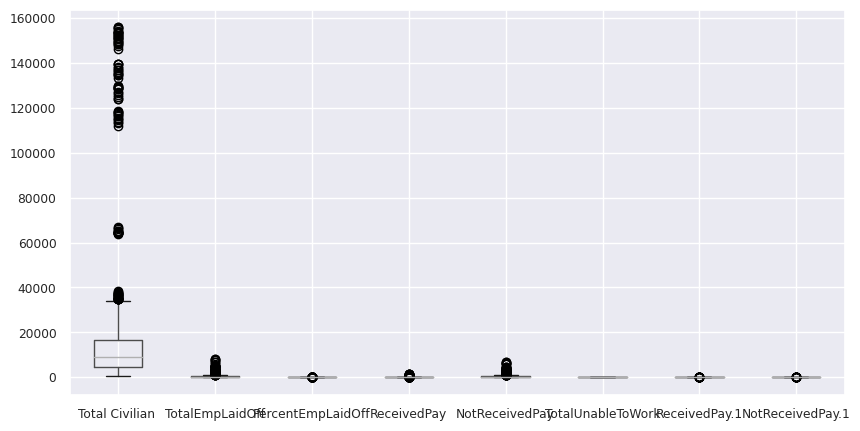

In [32]:
# Create a boxplot of each variable to identify outliers
df.boxplot(figsize=(10,5))
plt.show()



In [33]:
# Calculate the correlation between pairs of variables
print(df.corr())



                   Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  \
Total Civilian            1.000000         0.841729          -0.083345   
TotalEmpLaidOff           0.841729         1.000000           0.213546   
PercentEmpLaidOff        -0.083345         0.213546           1.000000   
ReceivedPay               0.833954         0.925331           0.055739   
NotReceivedPay            0.827400         0.996909           0.241388   
TotalUnableToWork              NaN              NaN                NaN   
ReceivedPay.1             0.063519        -0.050128          -0.394186   
NotReceivedPay.1         -0.065725         0.047652           0.392851   

                   ReceivedPay  NotReceivedPay  TotalUnableToWork  \
Total Civilian        0.833954        0.827400                NaN   
TotalEmpLaidOff       0.925331        0.996909                NaN   
PercentEmpLaidOff     0.055739        0.241388                NaN   
ReceivedPay           1.000000        0.892505           

In [34]:
# Create a crosstabulation of two categorical variables
print(pd.crosstab(df['Characteristic'], df['Month']))



Month                                               2021-01  2021-02  2021-03  \
Characteristic                                                                  
Agriculture and related industries                        1        1        1   
Management, professional, and related occupations         1        1        1   
Natural resources, construction, and maintenanc...        1        1        1   
Nonagricultural industries                                1        1        1   
Production, transportation, and material moving...        1        1        1   
...                                                     ...      ...      ...   
       Utilities                                          1        1        1   
       Wholesale trade                                    1        1        1   
           Hospitals                                      1        1        1   
           Health services, except hospitals              1        1        1   
           Social assistance

In [35]:
print(df.columns)

Index(['Characteristic', 'Total Civilian ', 'TotalEmpLaidOff',
       'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay',
       'TotalUnableToWork', 'ReceivedPay.1', 'NotReceivedPay.1', 'Month'],
      dtype='object')


Correlation Analysis


In [36]:
import pandas as pd

# Read the data into a pandas DataFrame
df = pd.read_excel('BLS-T7.xlsx')

# Group the data by 'Characteristic'
grouped = df.groupby('Characteristic')

# Iterate over each group and calculate the correlation matrix
for name, group in grouped:
    print(f"Correlation matrix for group '{name}':")
    corr_matrix = group.corr()
    print(corr_matrix)
    print()



Correlation matrix for group 'Agriculture and related industries':
                   Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  \
Total Civilian            1.000000        -0.124221          -0.192790   
TotalEmpLaidOff          -0.124221         1.000000           0.997005   
PercentEmpLaidOff        -0.192790         0.997005           1.000000   
TotalUnableToWork              NaN              NaN                NaN   

                   TotalUnableToWork  
Total Civilian                   NaN  
TotalEmpLaidOff                  NaN  
PercentEmpLaidOff                NaN  
TotalUnableToWork                NaN  

Correlation matrix for group 'Management, professional, and related occupations':
                   Total Civilian   TotalEmpLaidOff  PercentEmpLaidOff  \
Total Civilian            1.000000        -0.495140          -0.524903   
TotalEmpLaidOff          -0.495140         1.000000           0.998853   
PercentEmpLaidOff        -0.524903         0.998853           

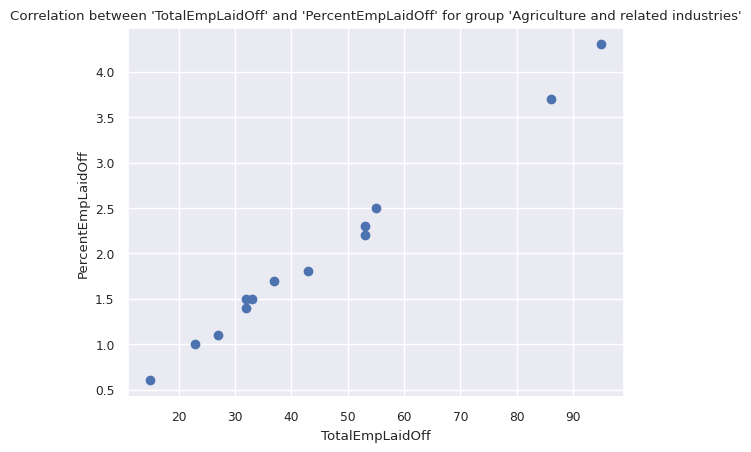

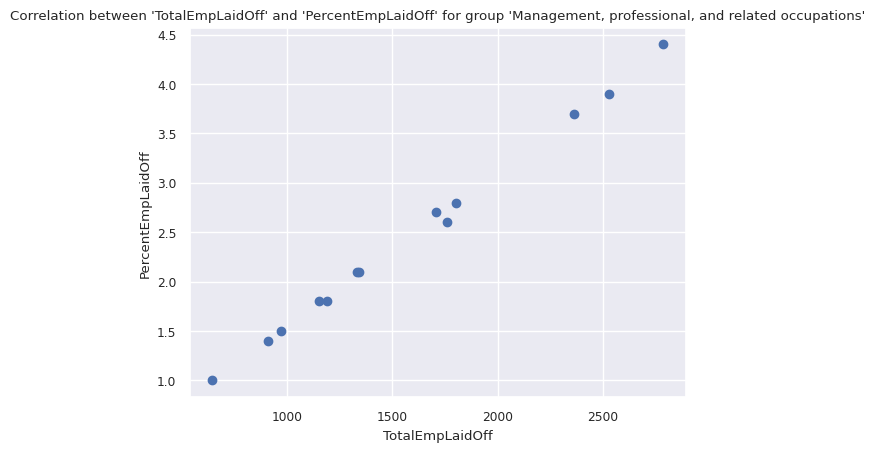

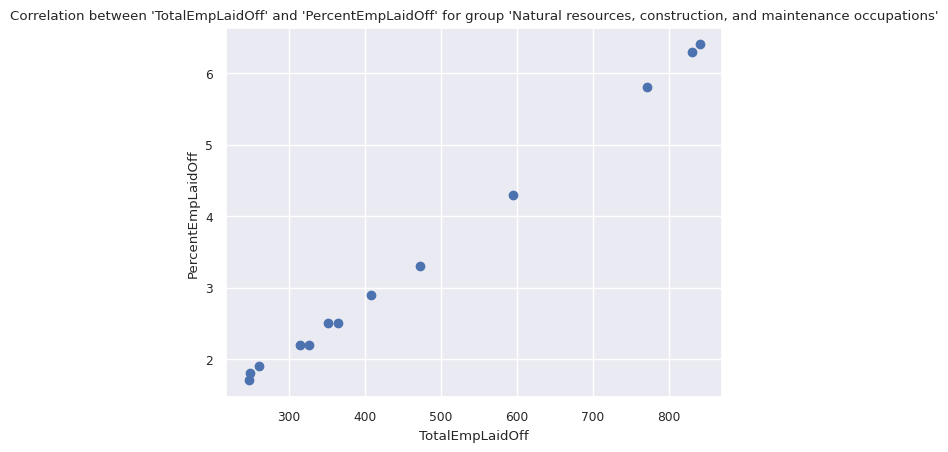

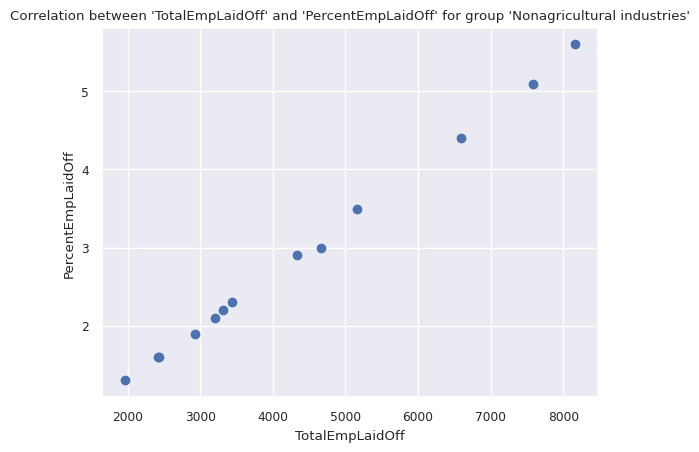

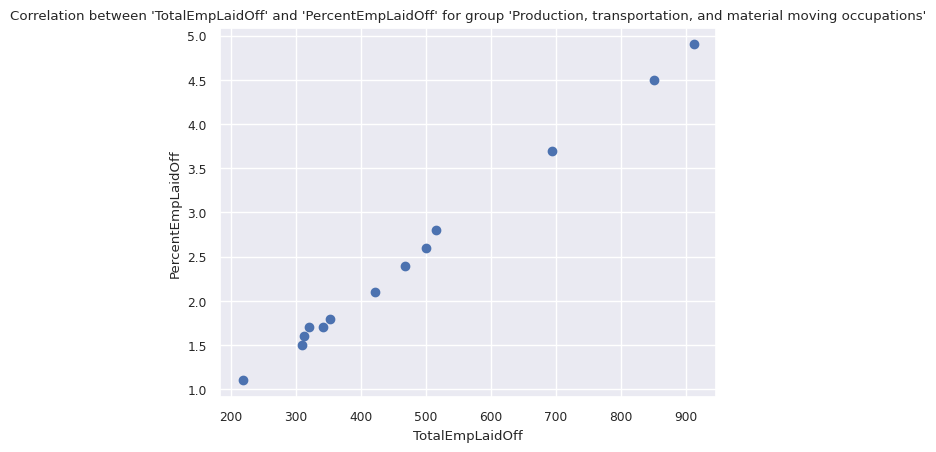

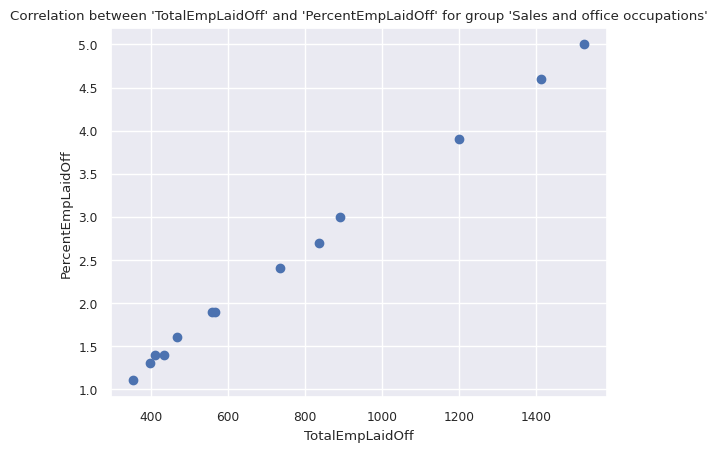

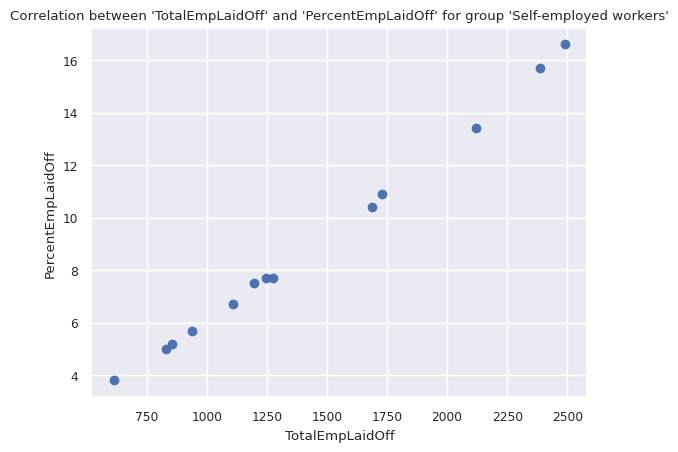

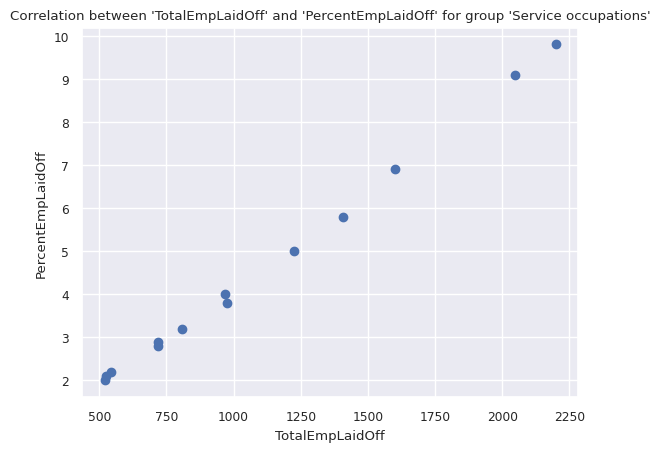

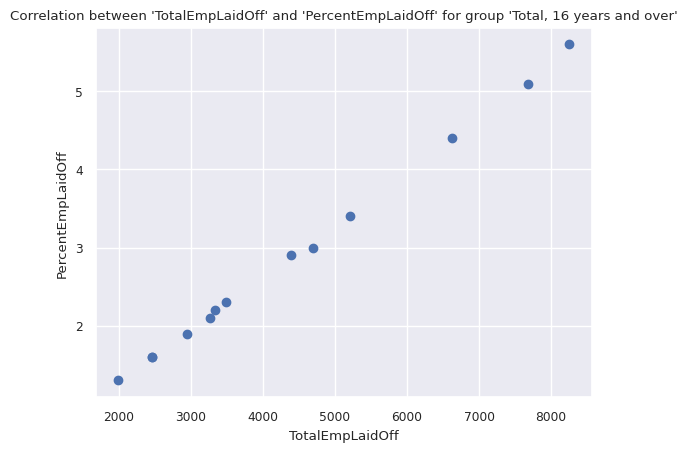

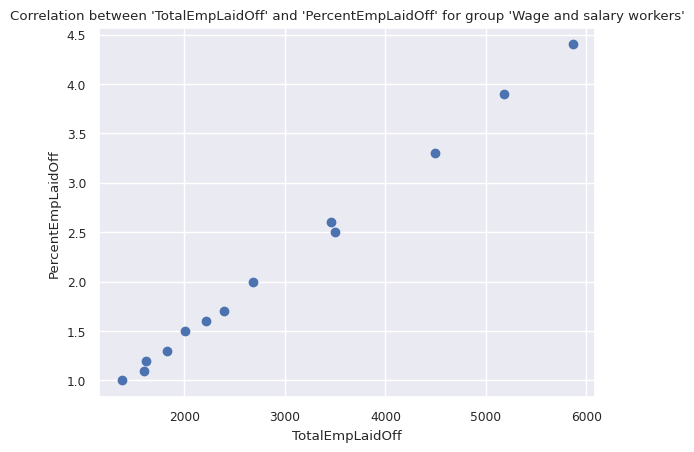

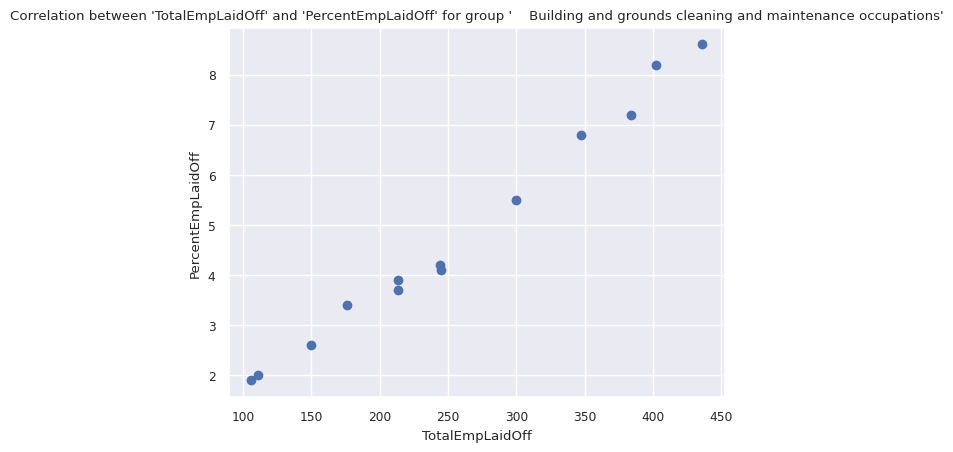

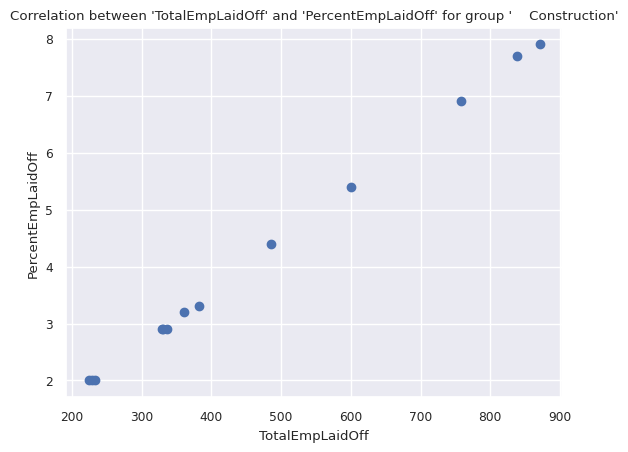

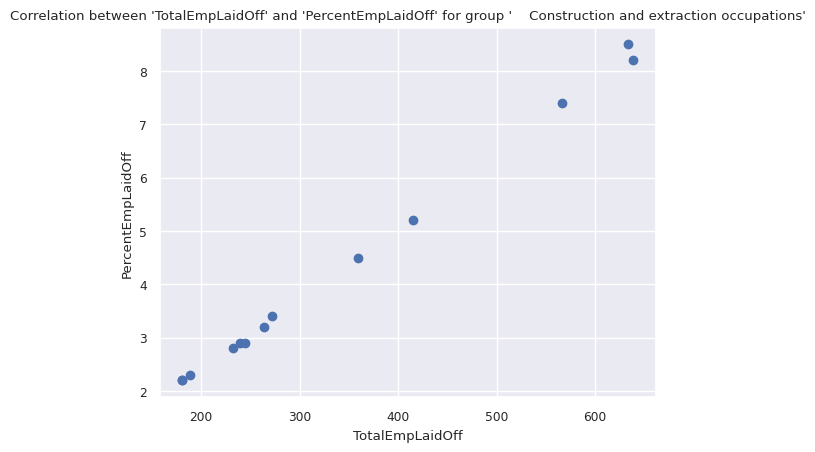

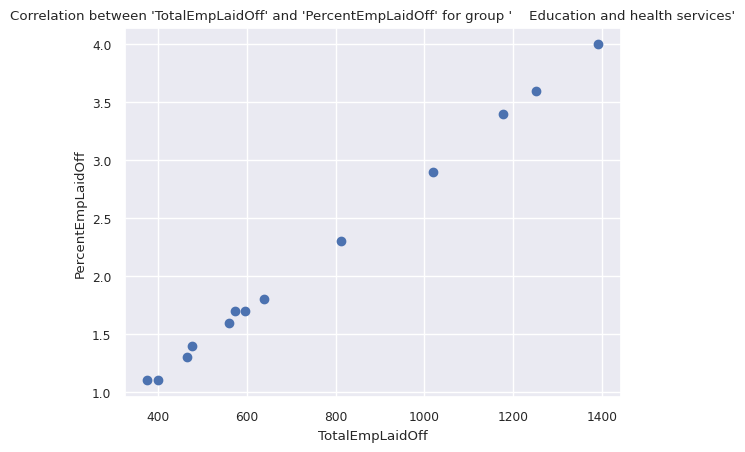

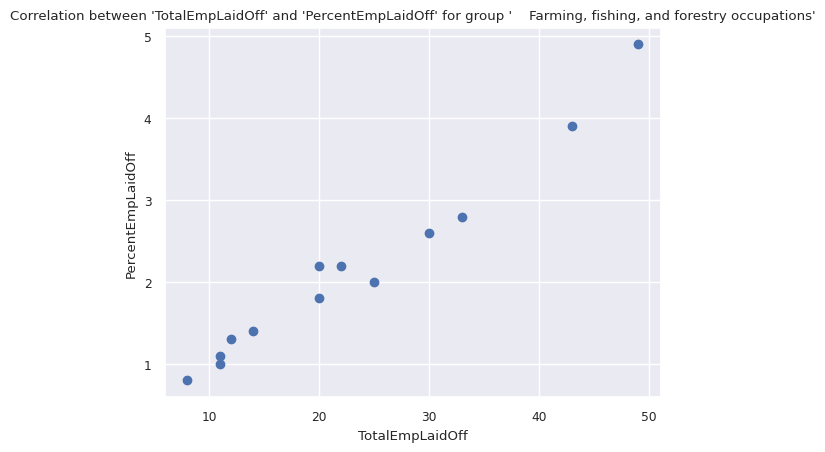

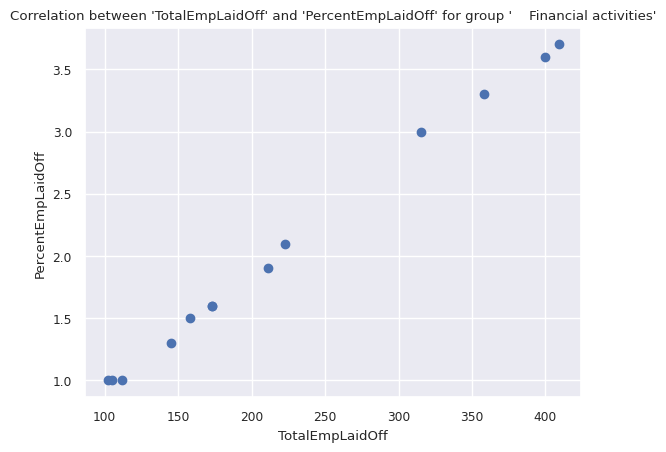

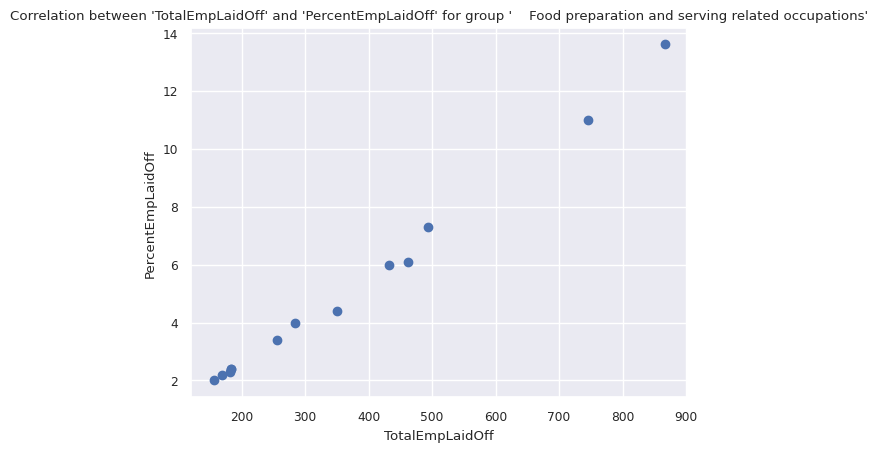

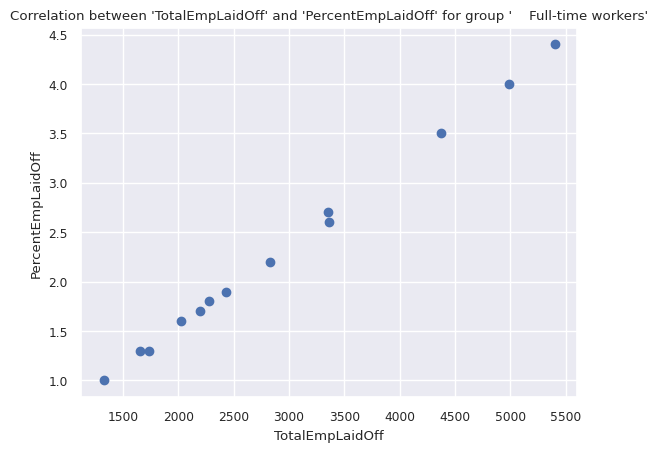

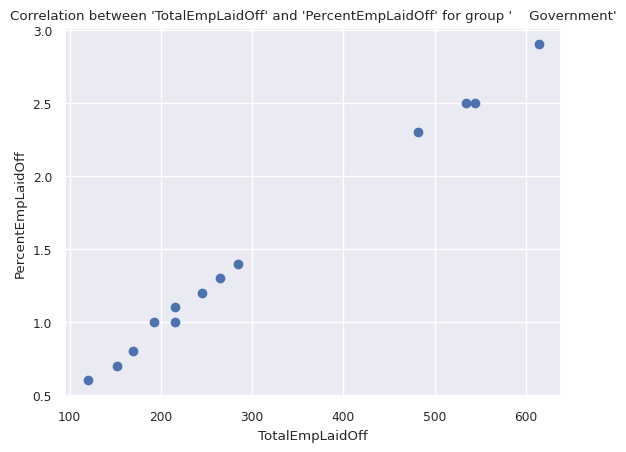

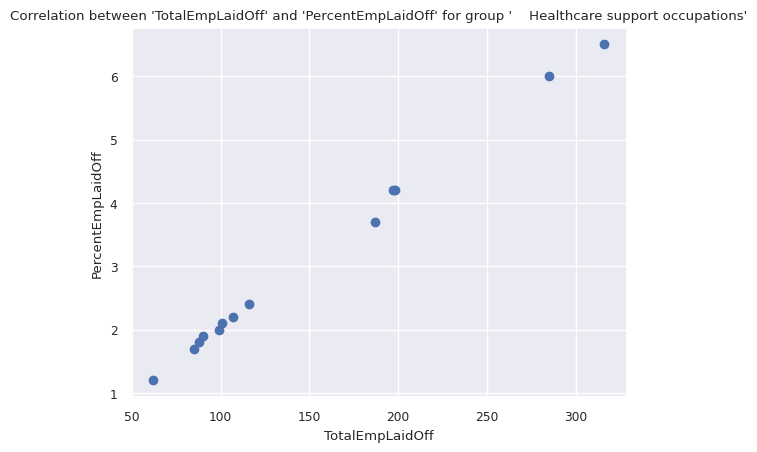

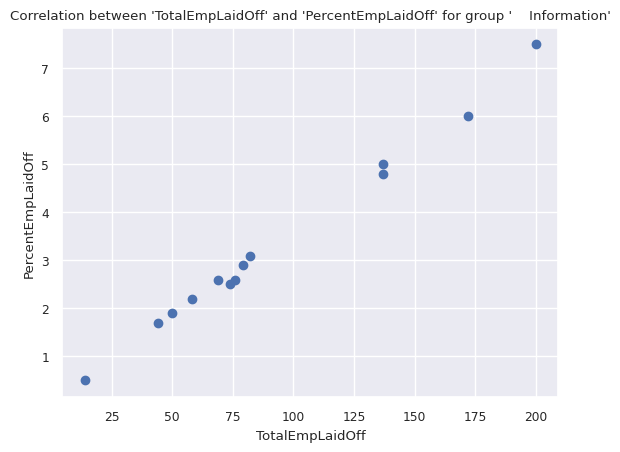

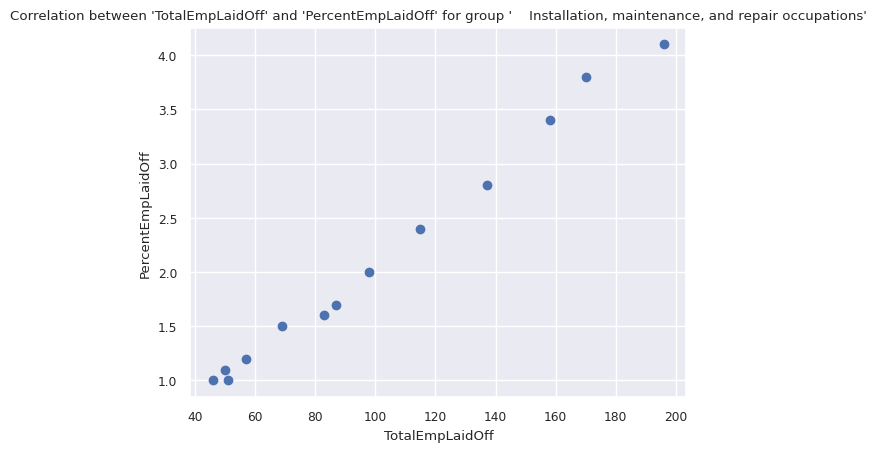

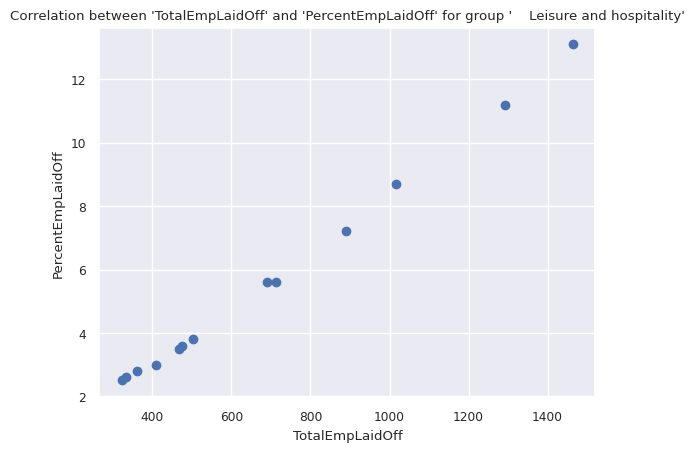

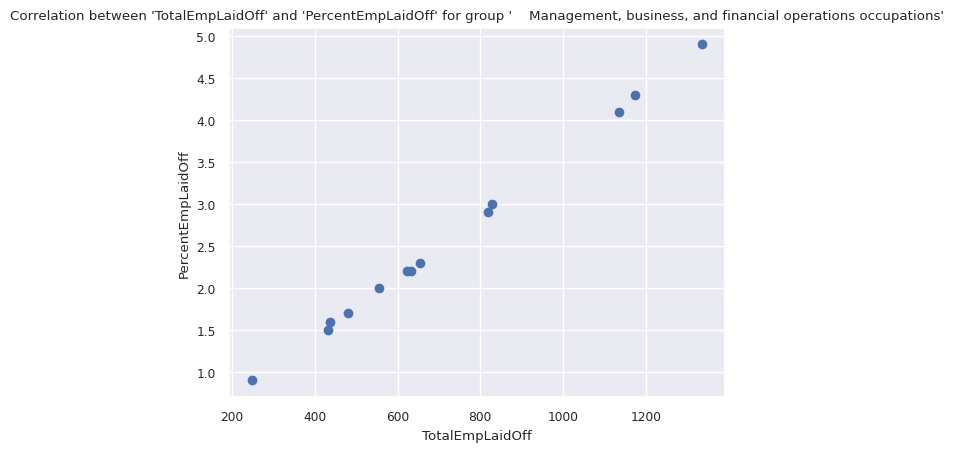

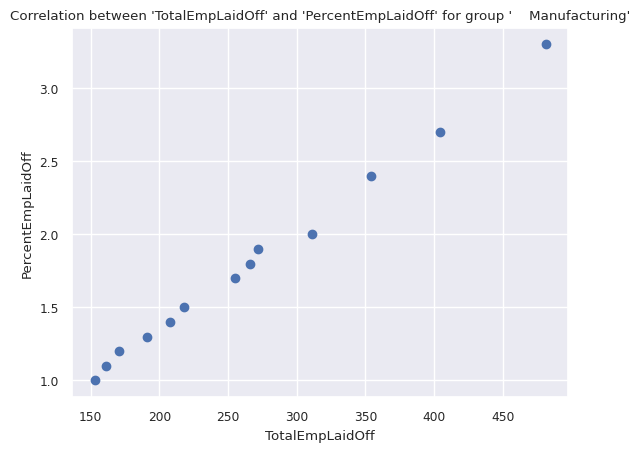

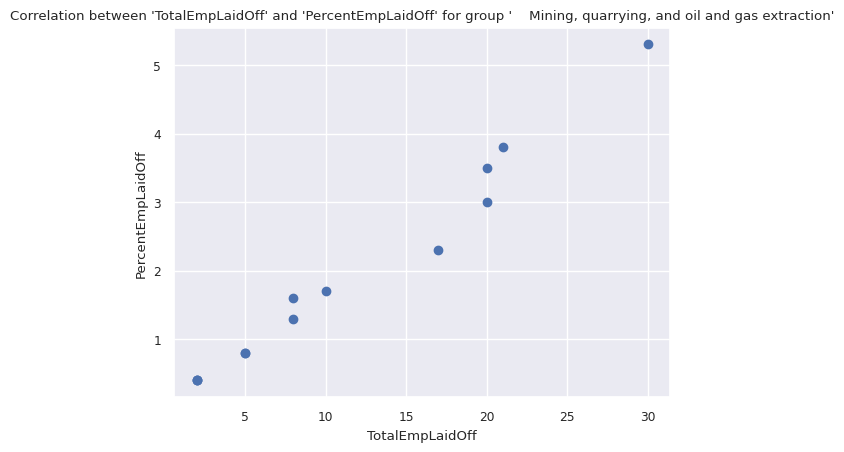

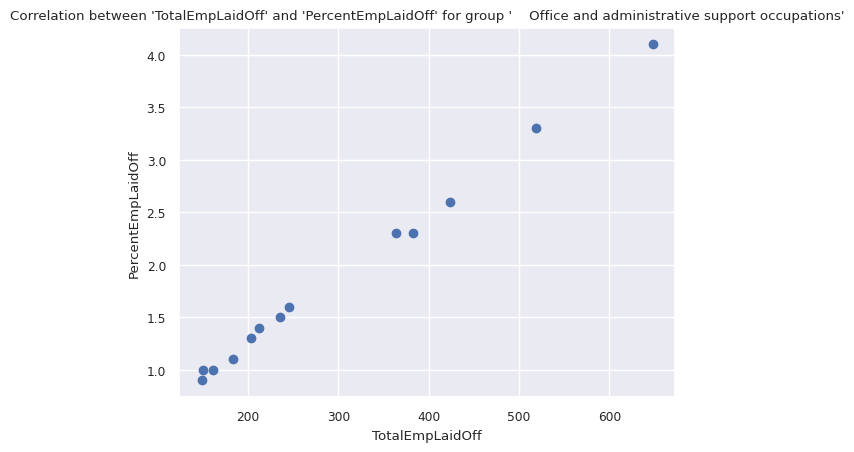

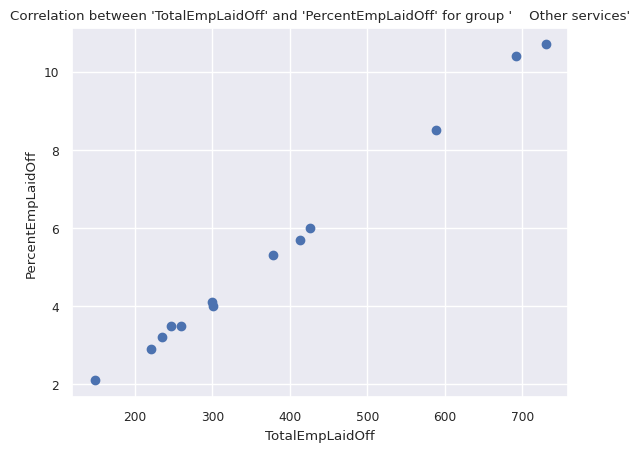

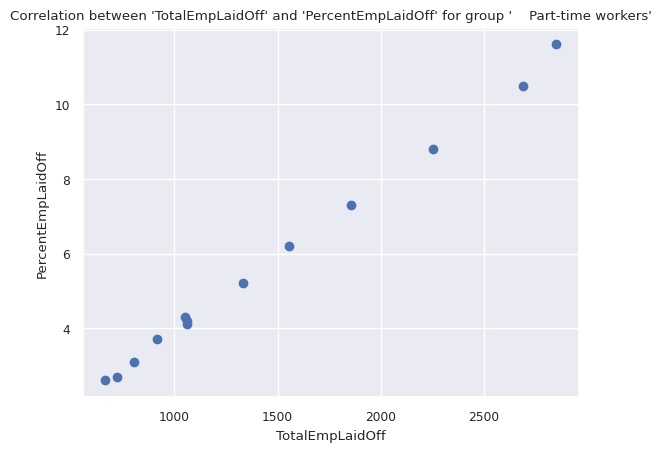

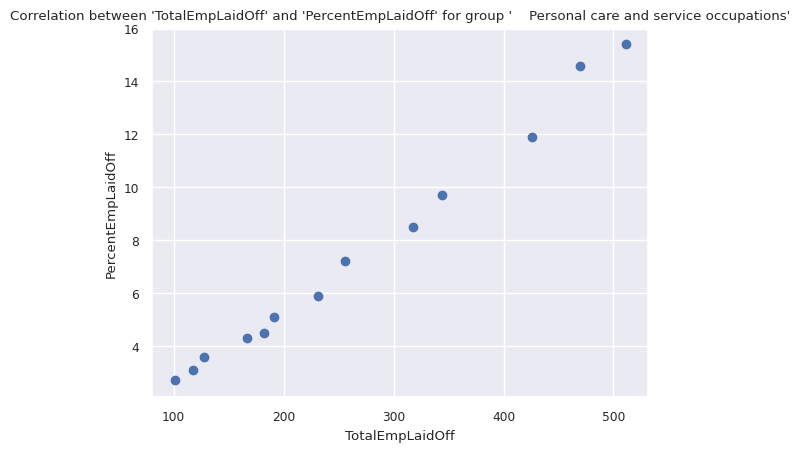

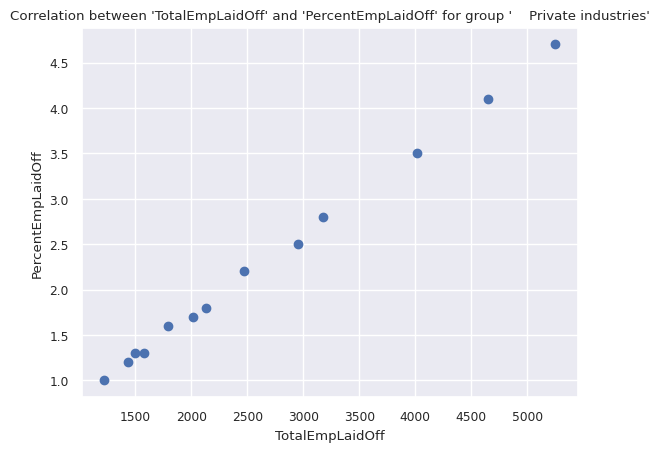

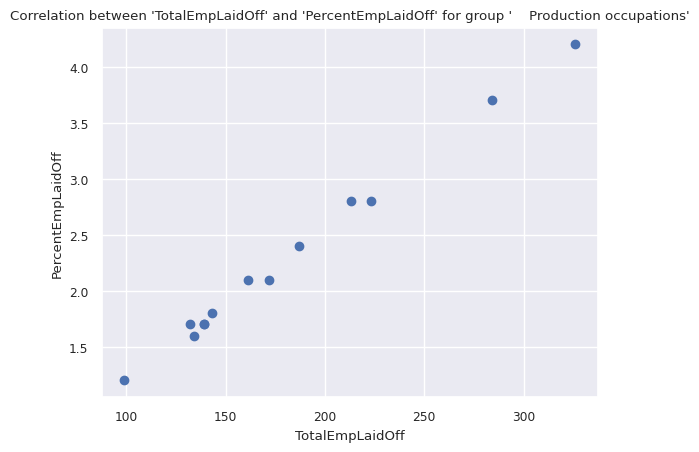

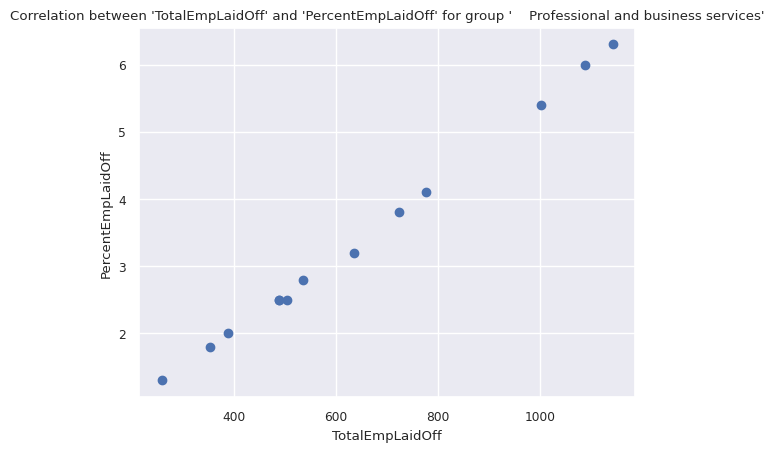

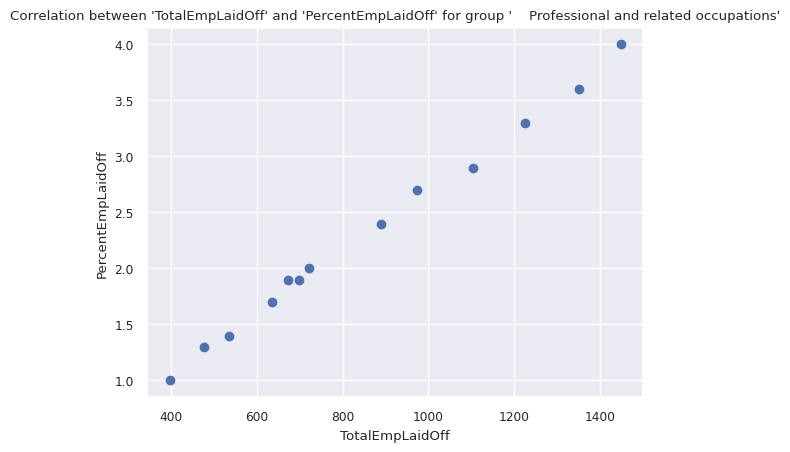

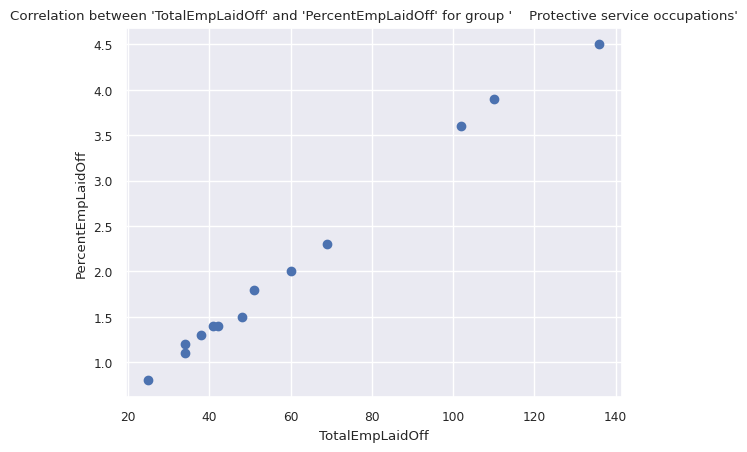

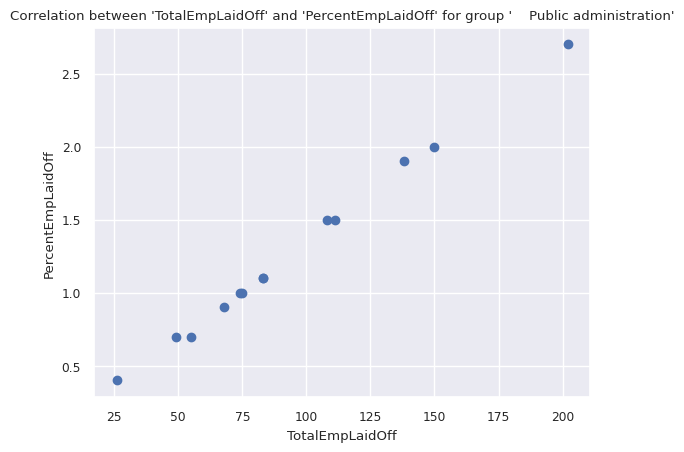

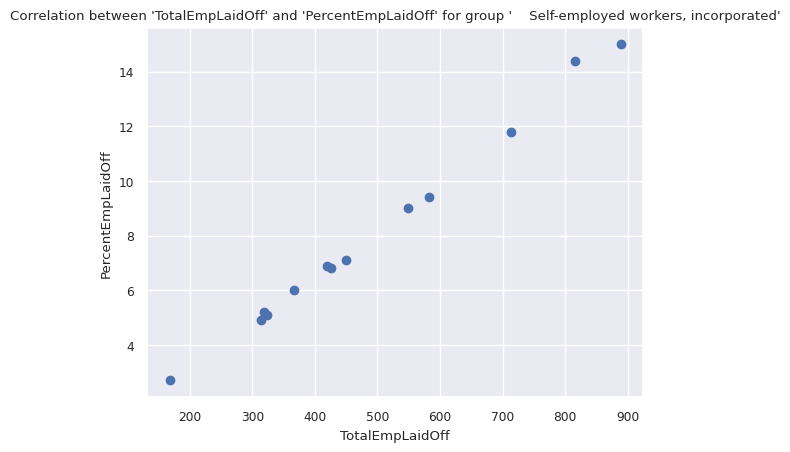

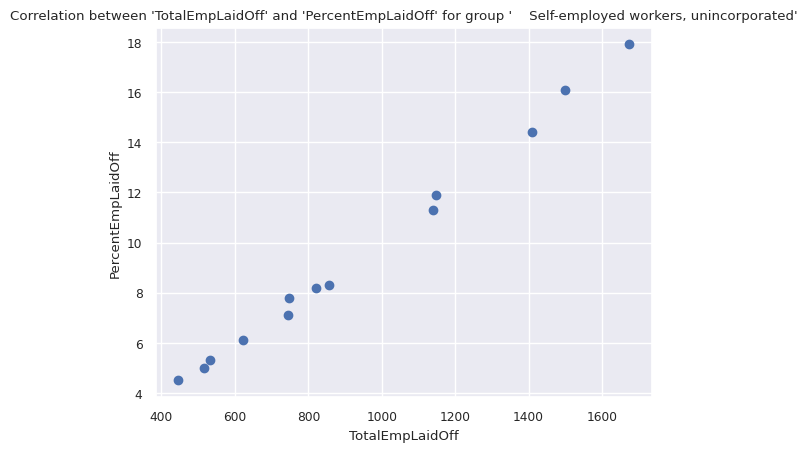

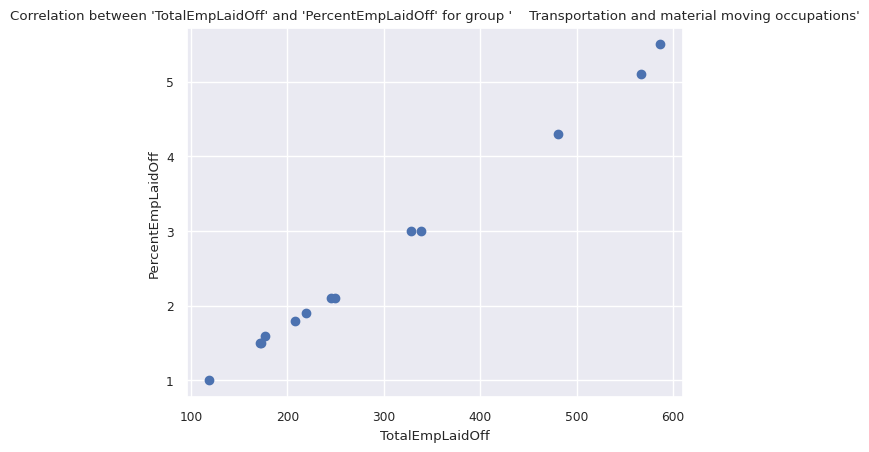

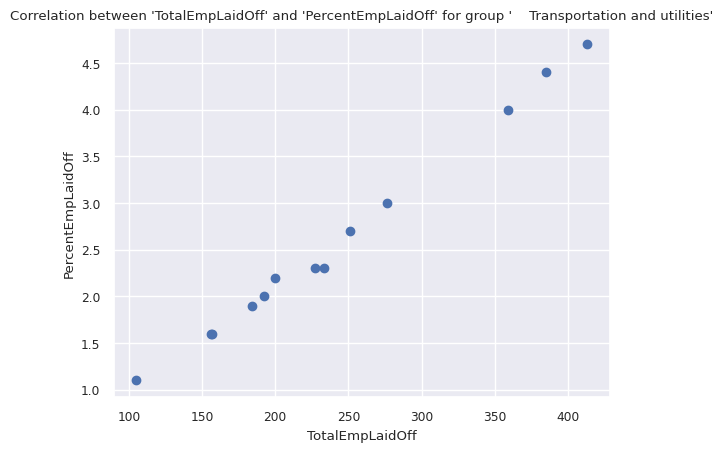

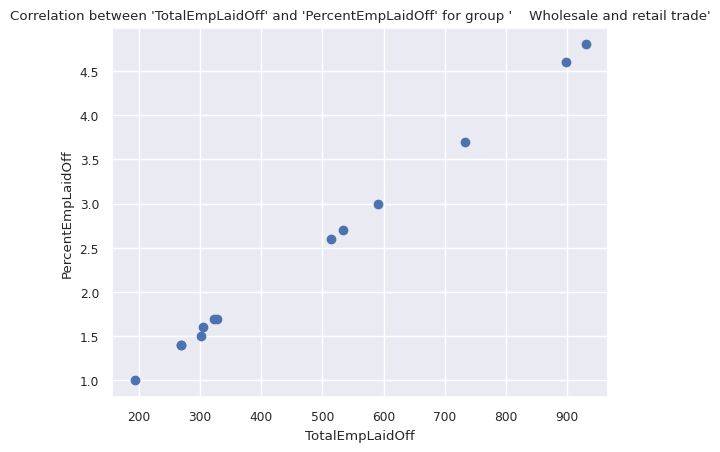

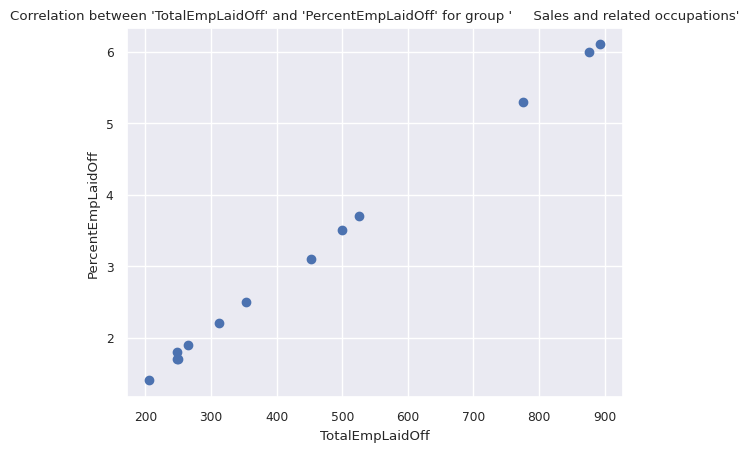

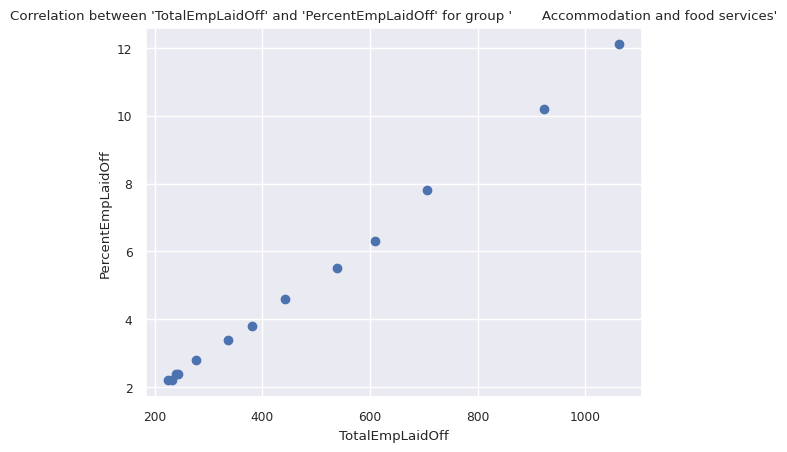

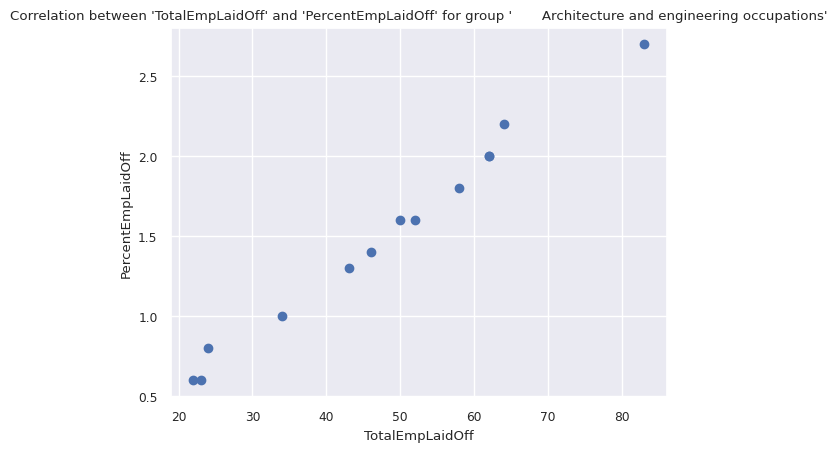

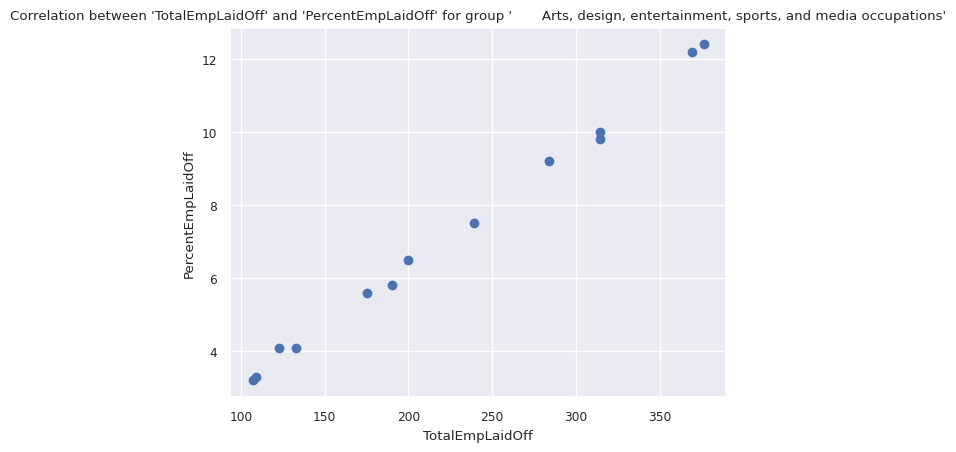

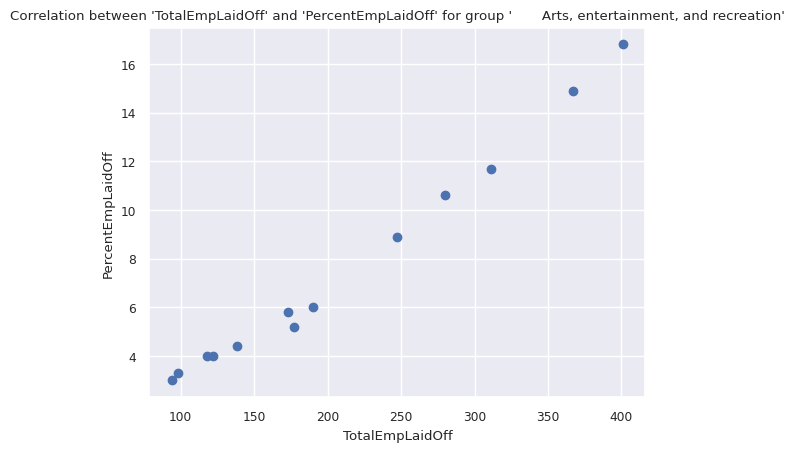

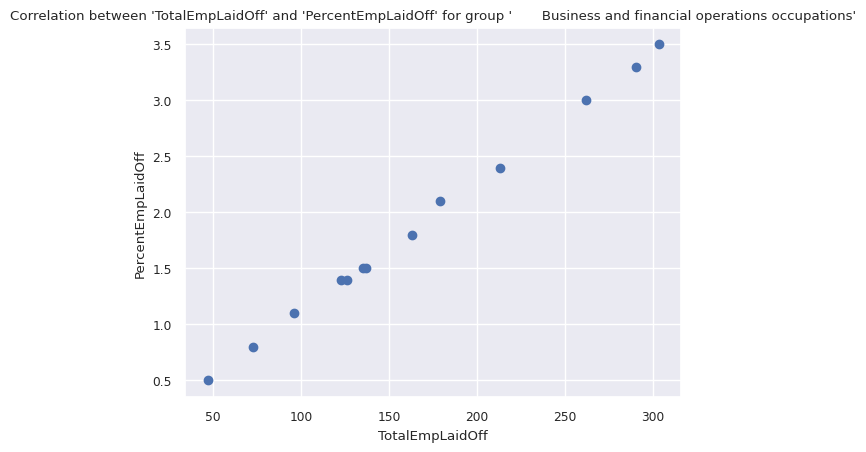

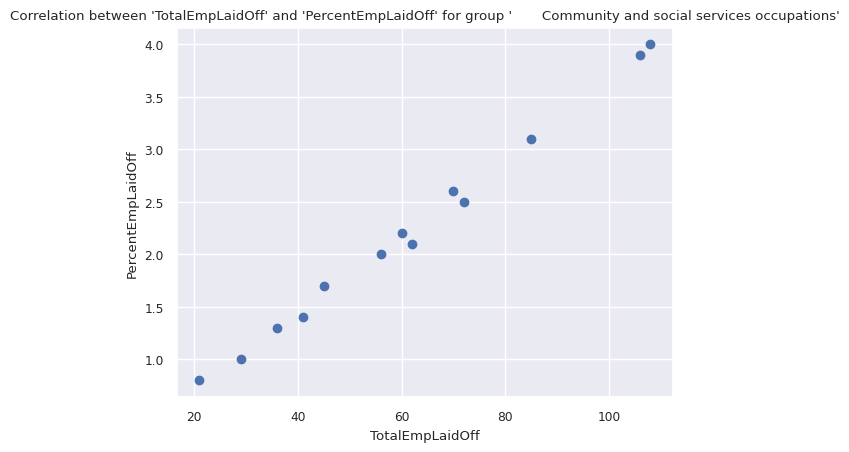

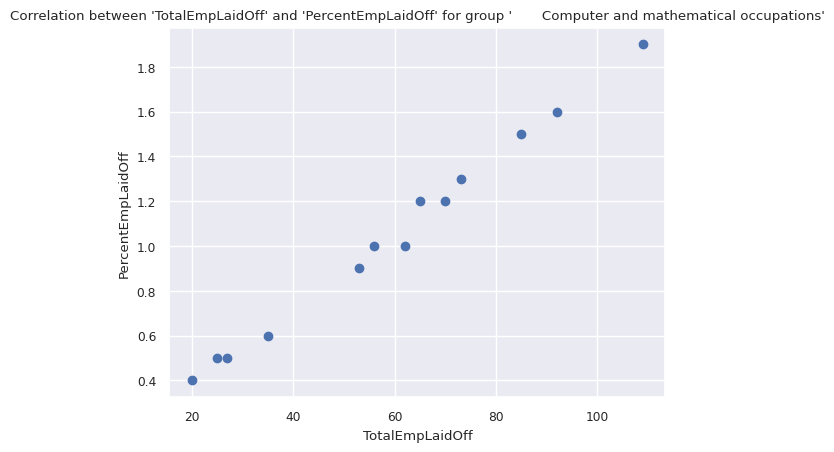

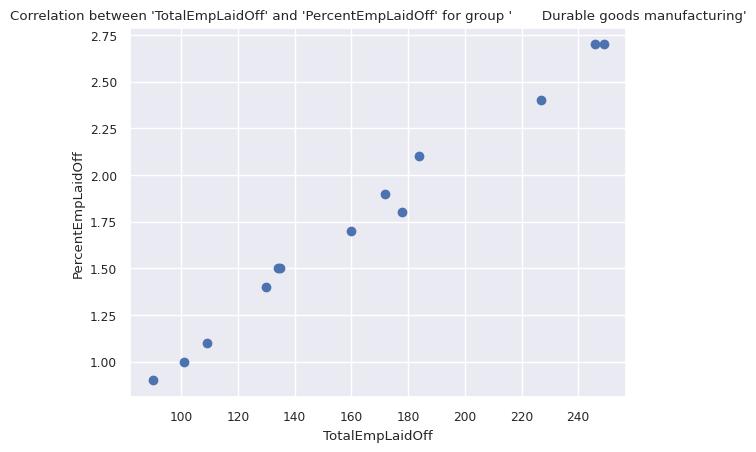

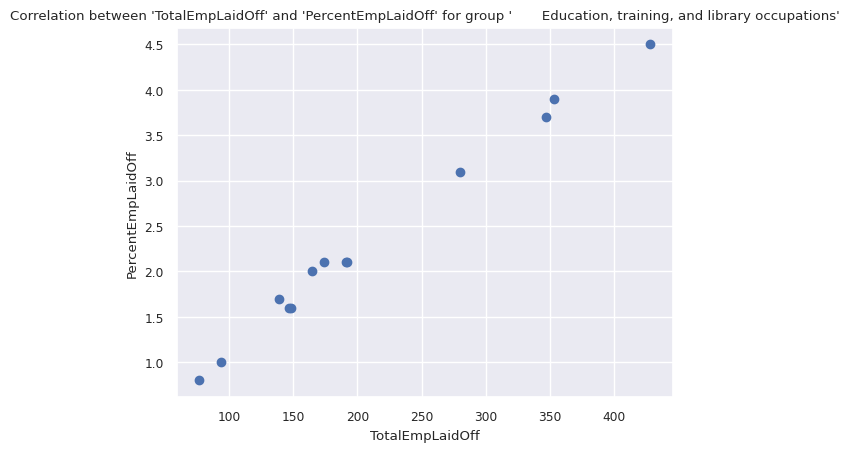

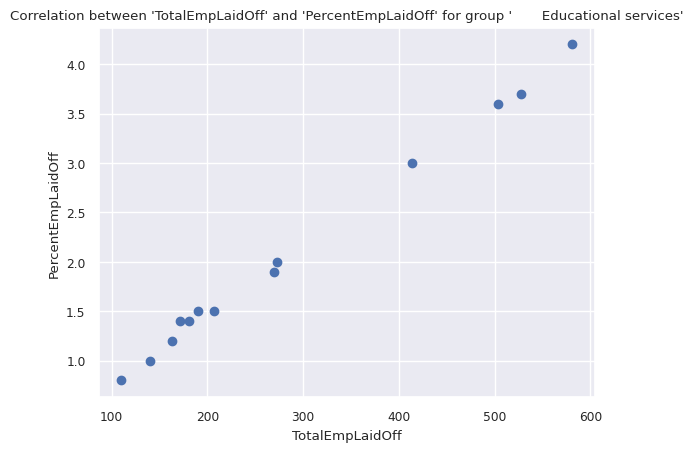

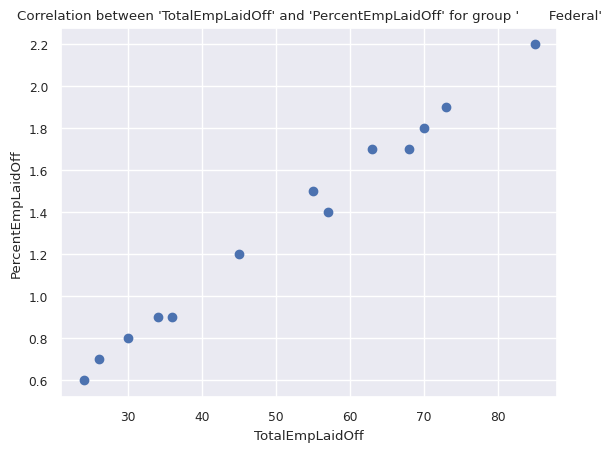

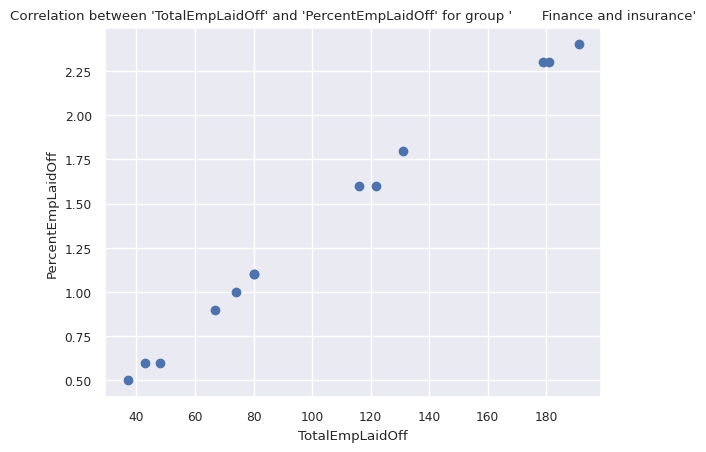

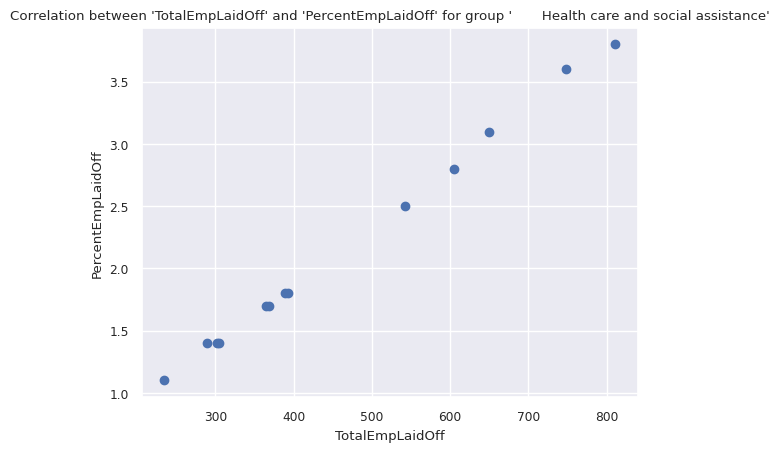

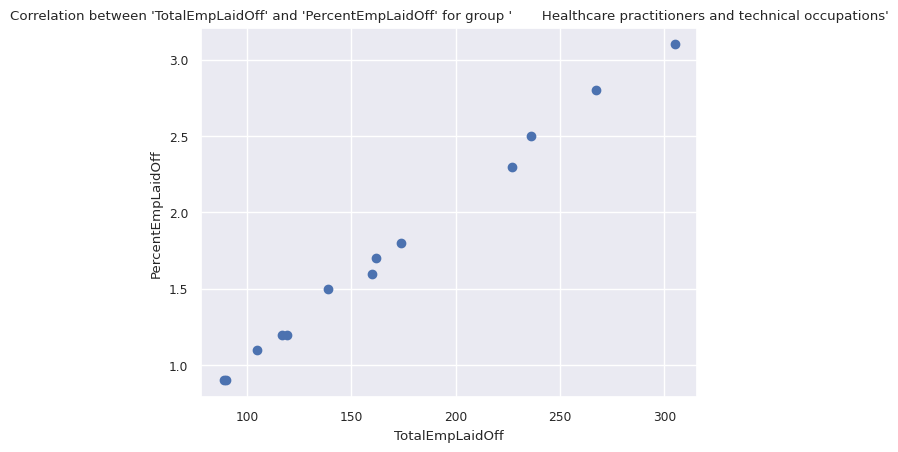

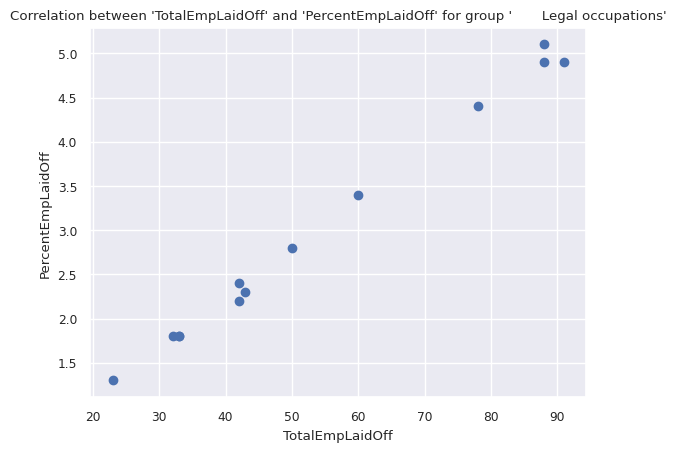

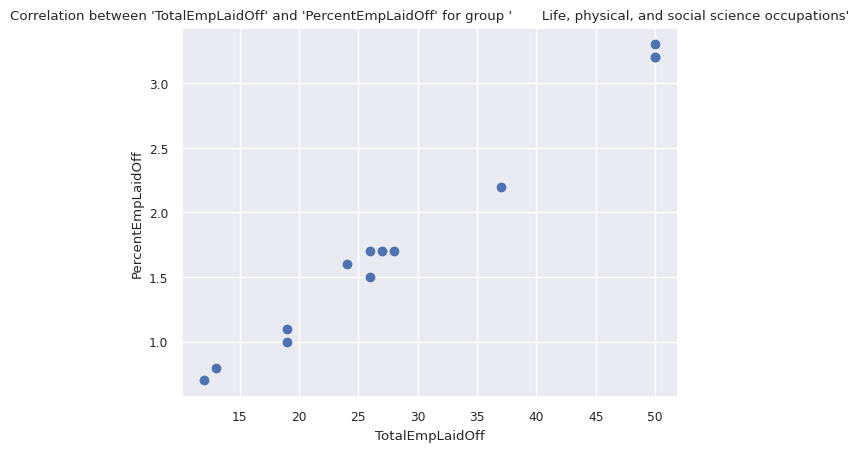

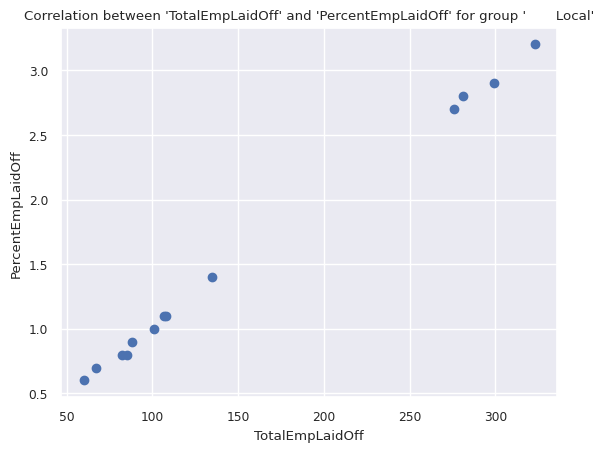

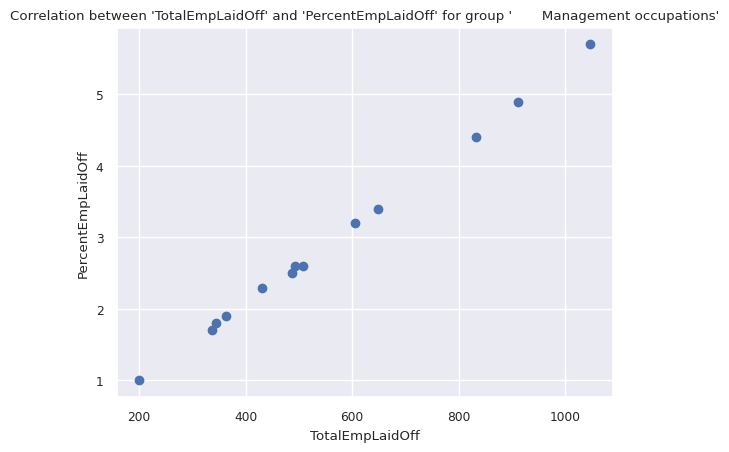

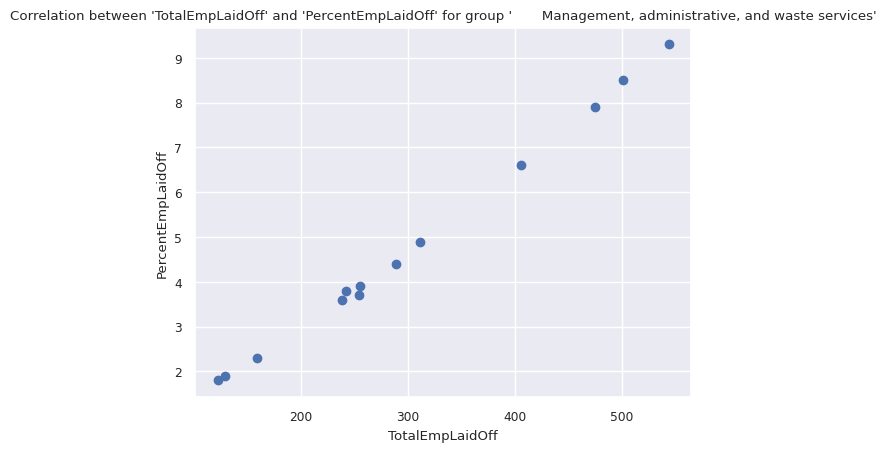

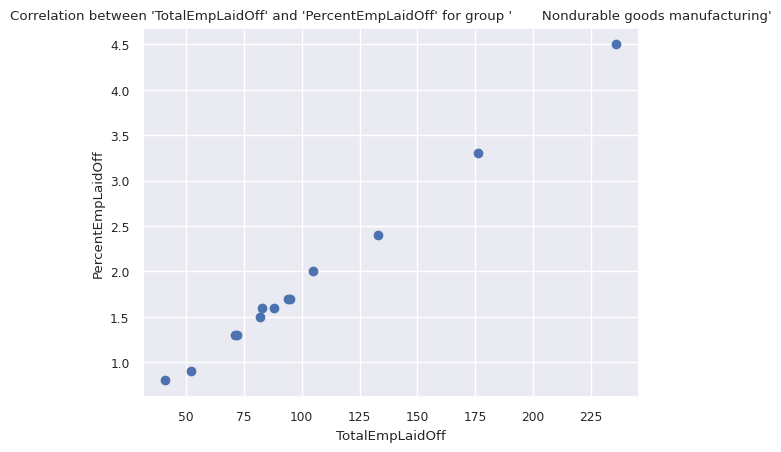

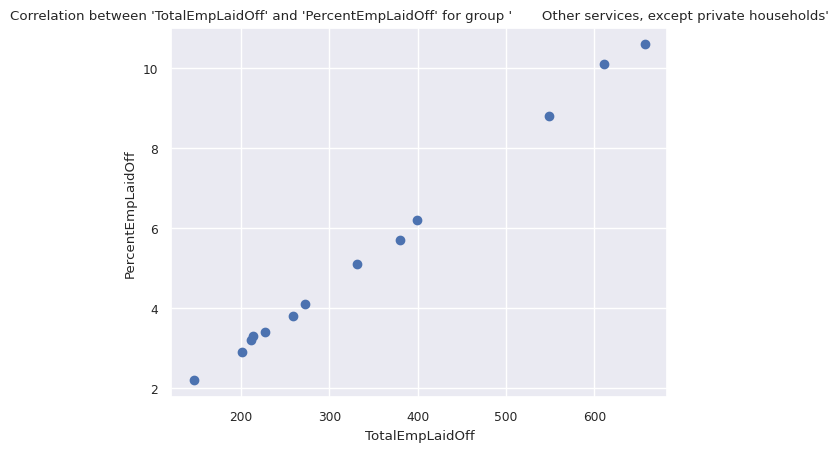

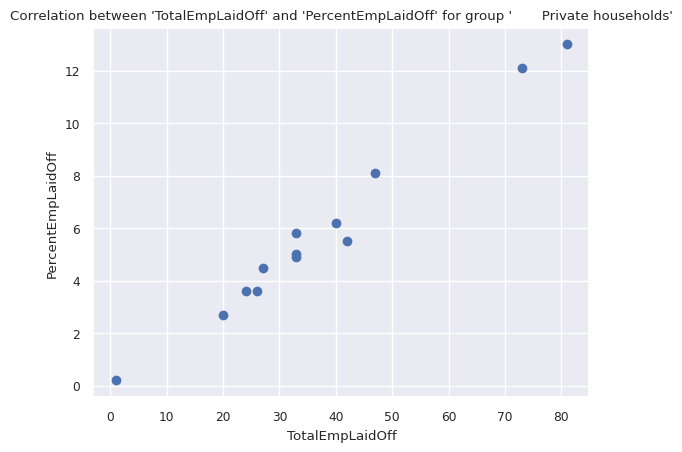

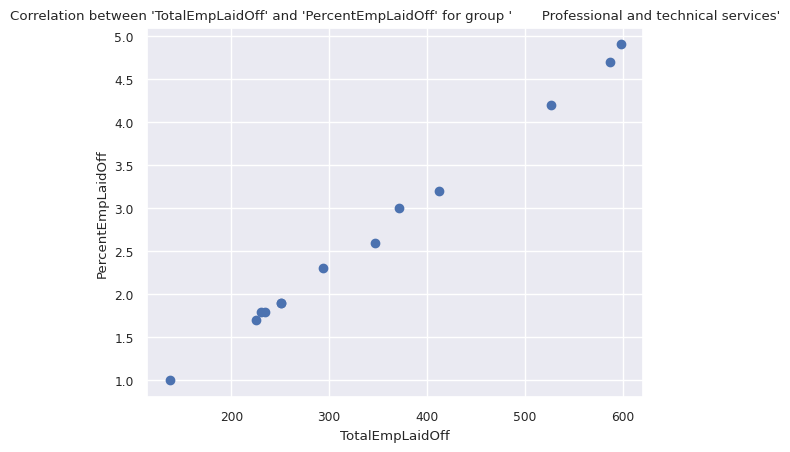

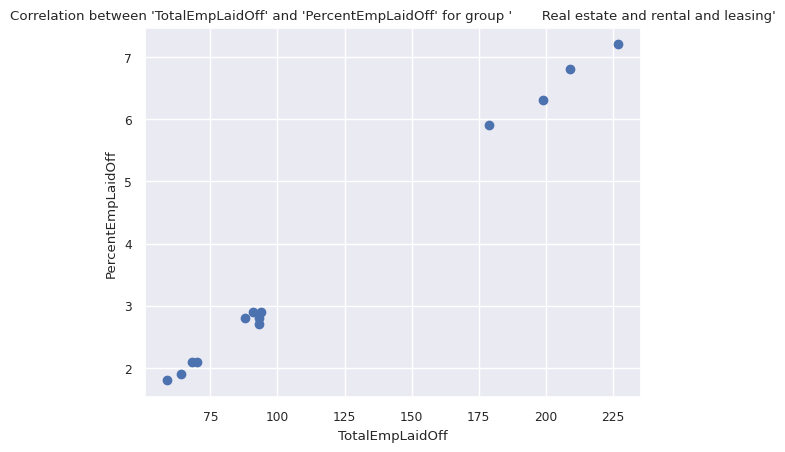

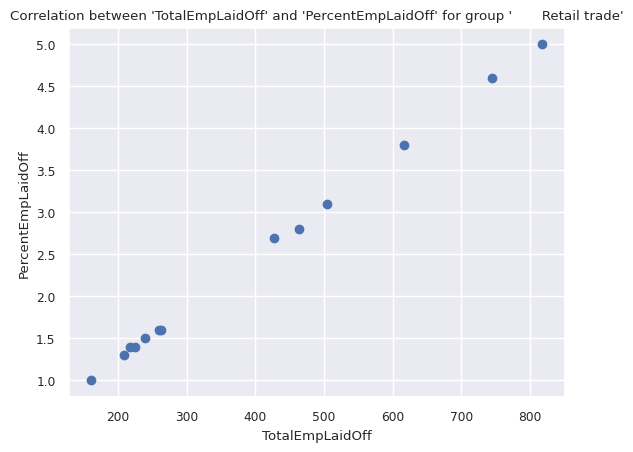

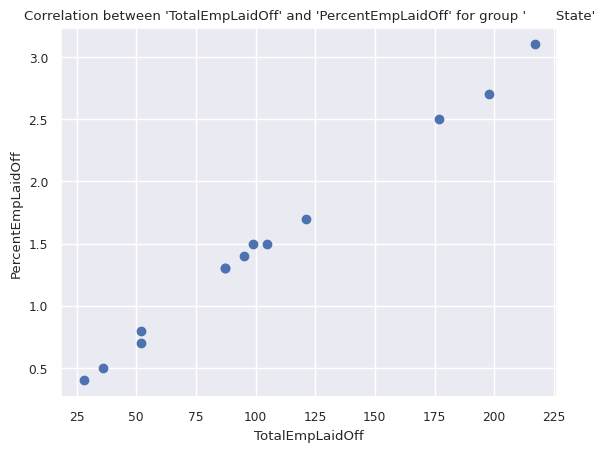

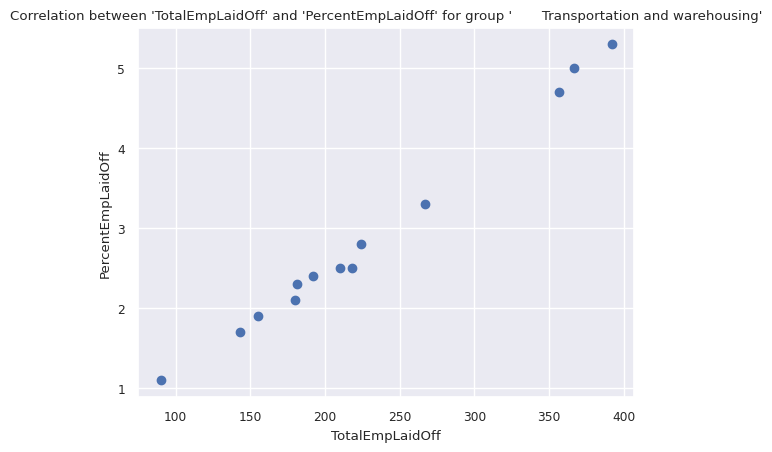

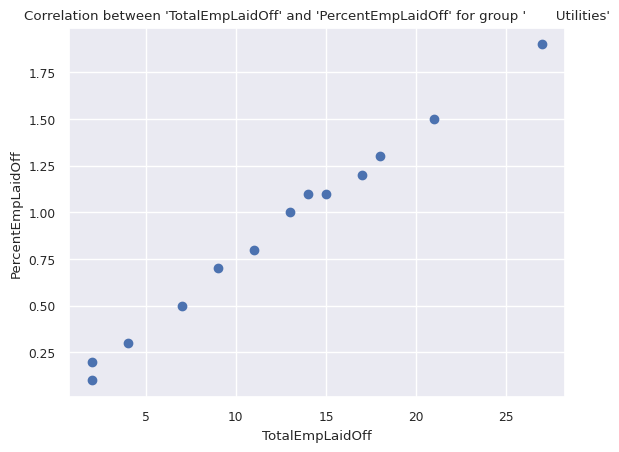

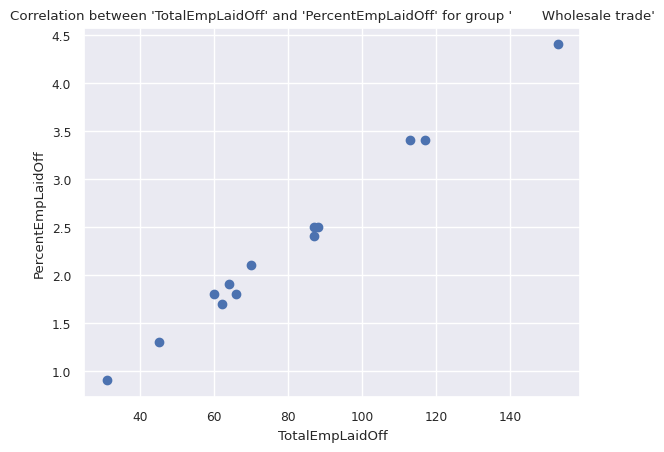

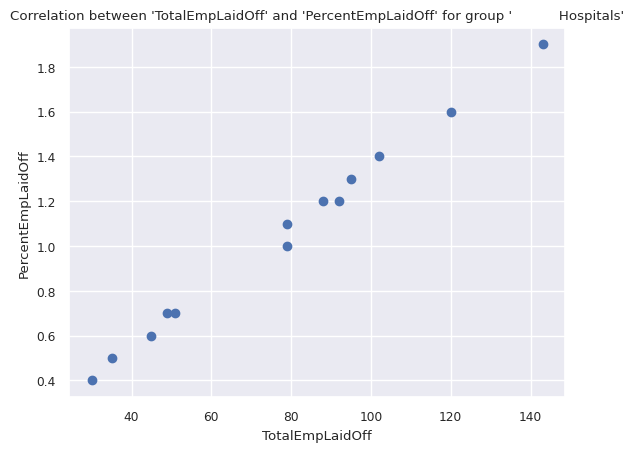

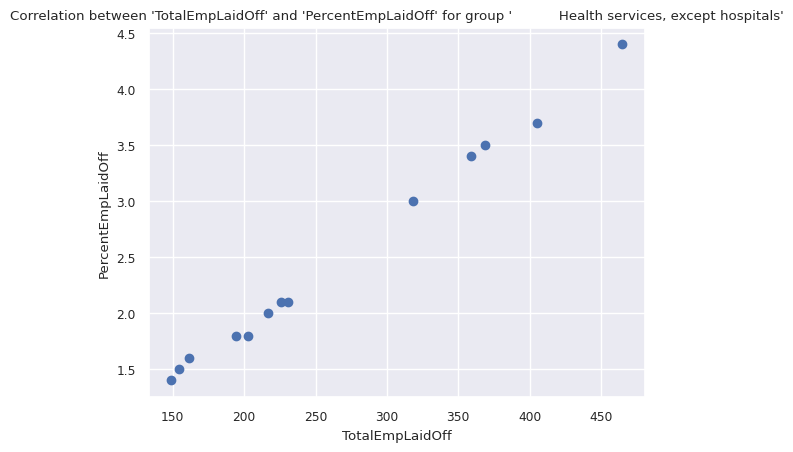

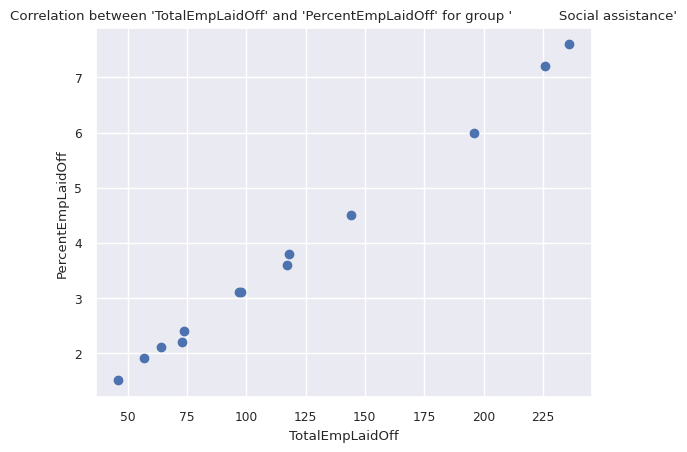

In [37]:
for name, group in grouped:
    # Plot the data points
    plt.scatter(group['TotalEmpLaidOff'], group['PercentEmpLaidOff'])
    # Set the plot title and axis labels
    plt.title(f"Correlation between 'TotalEmpLaidOff' and 'PercentEmpLaidOff' for group '{name}'")
    plt.xlabel('TotalEmpLaidOff')
    plt.ylabel('PercentEmpLaidOff')
    # Display the plot
    plt.show()

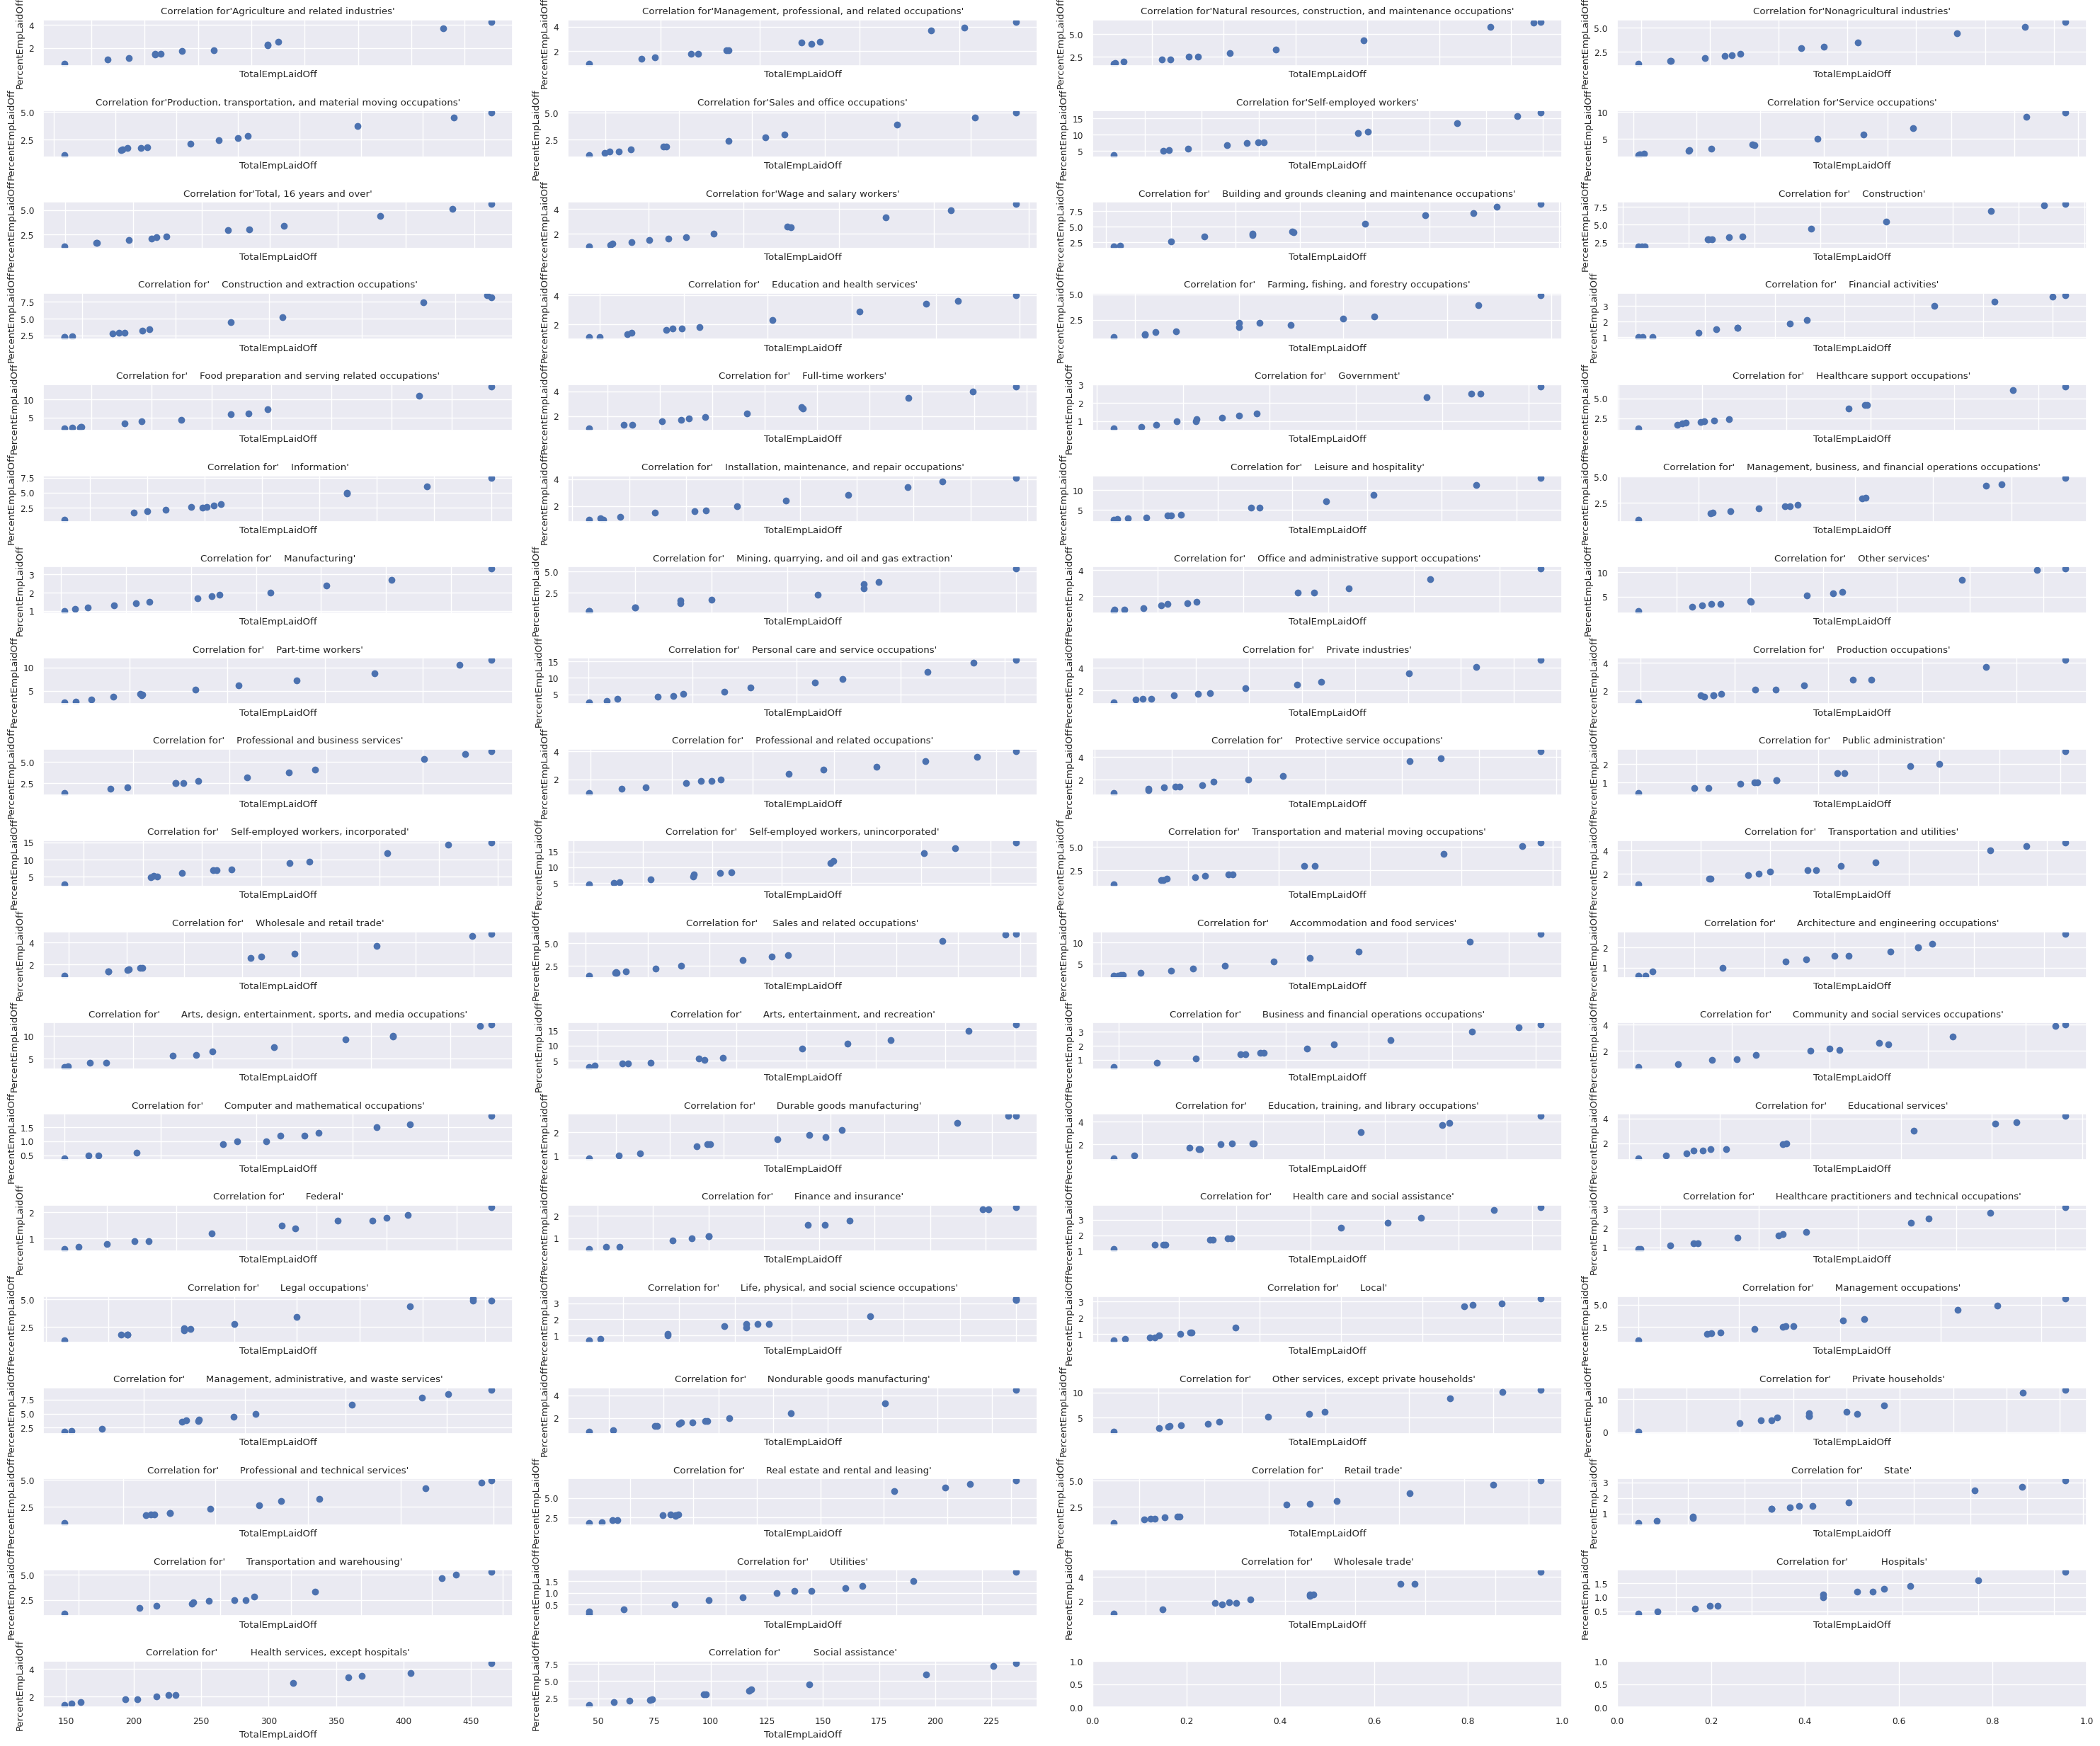

In [38]:


# Create a grid of subplots with 4 plots in each row
fig, axes = plt.subplots(nrows=len(grouped)//4+1, ncols=4, figsize=(30, 25))

# Iterate over the rows and columns of the subplot grid
for i in range(len(grouped)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    # Get the name and data of the current group
    name, group = list(grouped)[i]
    
    # Plot the data points on the current subplot
    ax.scatter(group['TotalEmpLaidOff'], group['PercentEmpLaidOff'])
    
    # Set the plot title and axis labels
    ax.set_title(f"Correlation for'{name}'")
    ax.set_xlabel('TotalEmpLaidOff')
    ax.set_ylabel('PercentEmpLaidOff')

    # Hide the x-axis labels for all but the bottom row
    if row < len(grouped)//4:
        plt.setp(ax.get_xticklabels(), visible=False)

# Adjust the layout of the subplots and the spacing between them
plt.tight_layout(pad=2)

# Display the plot
plt.show()


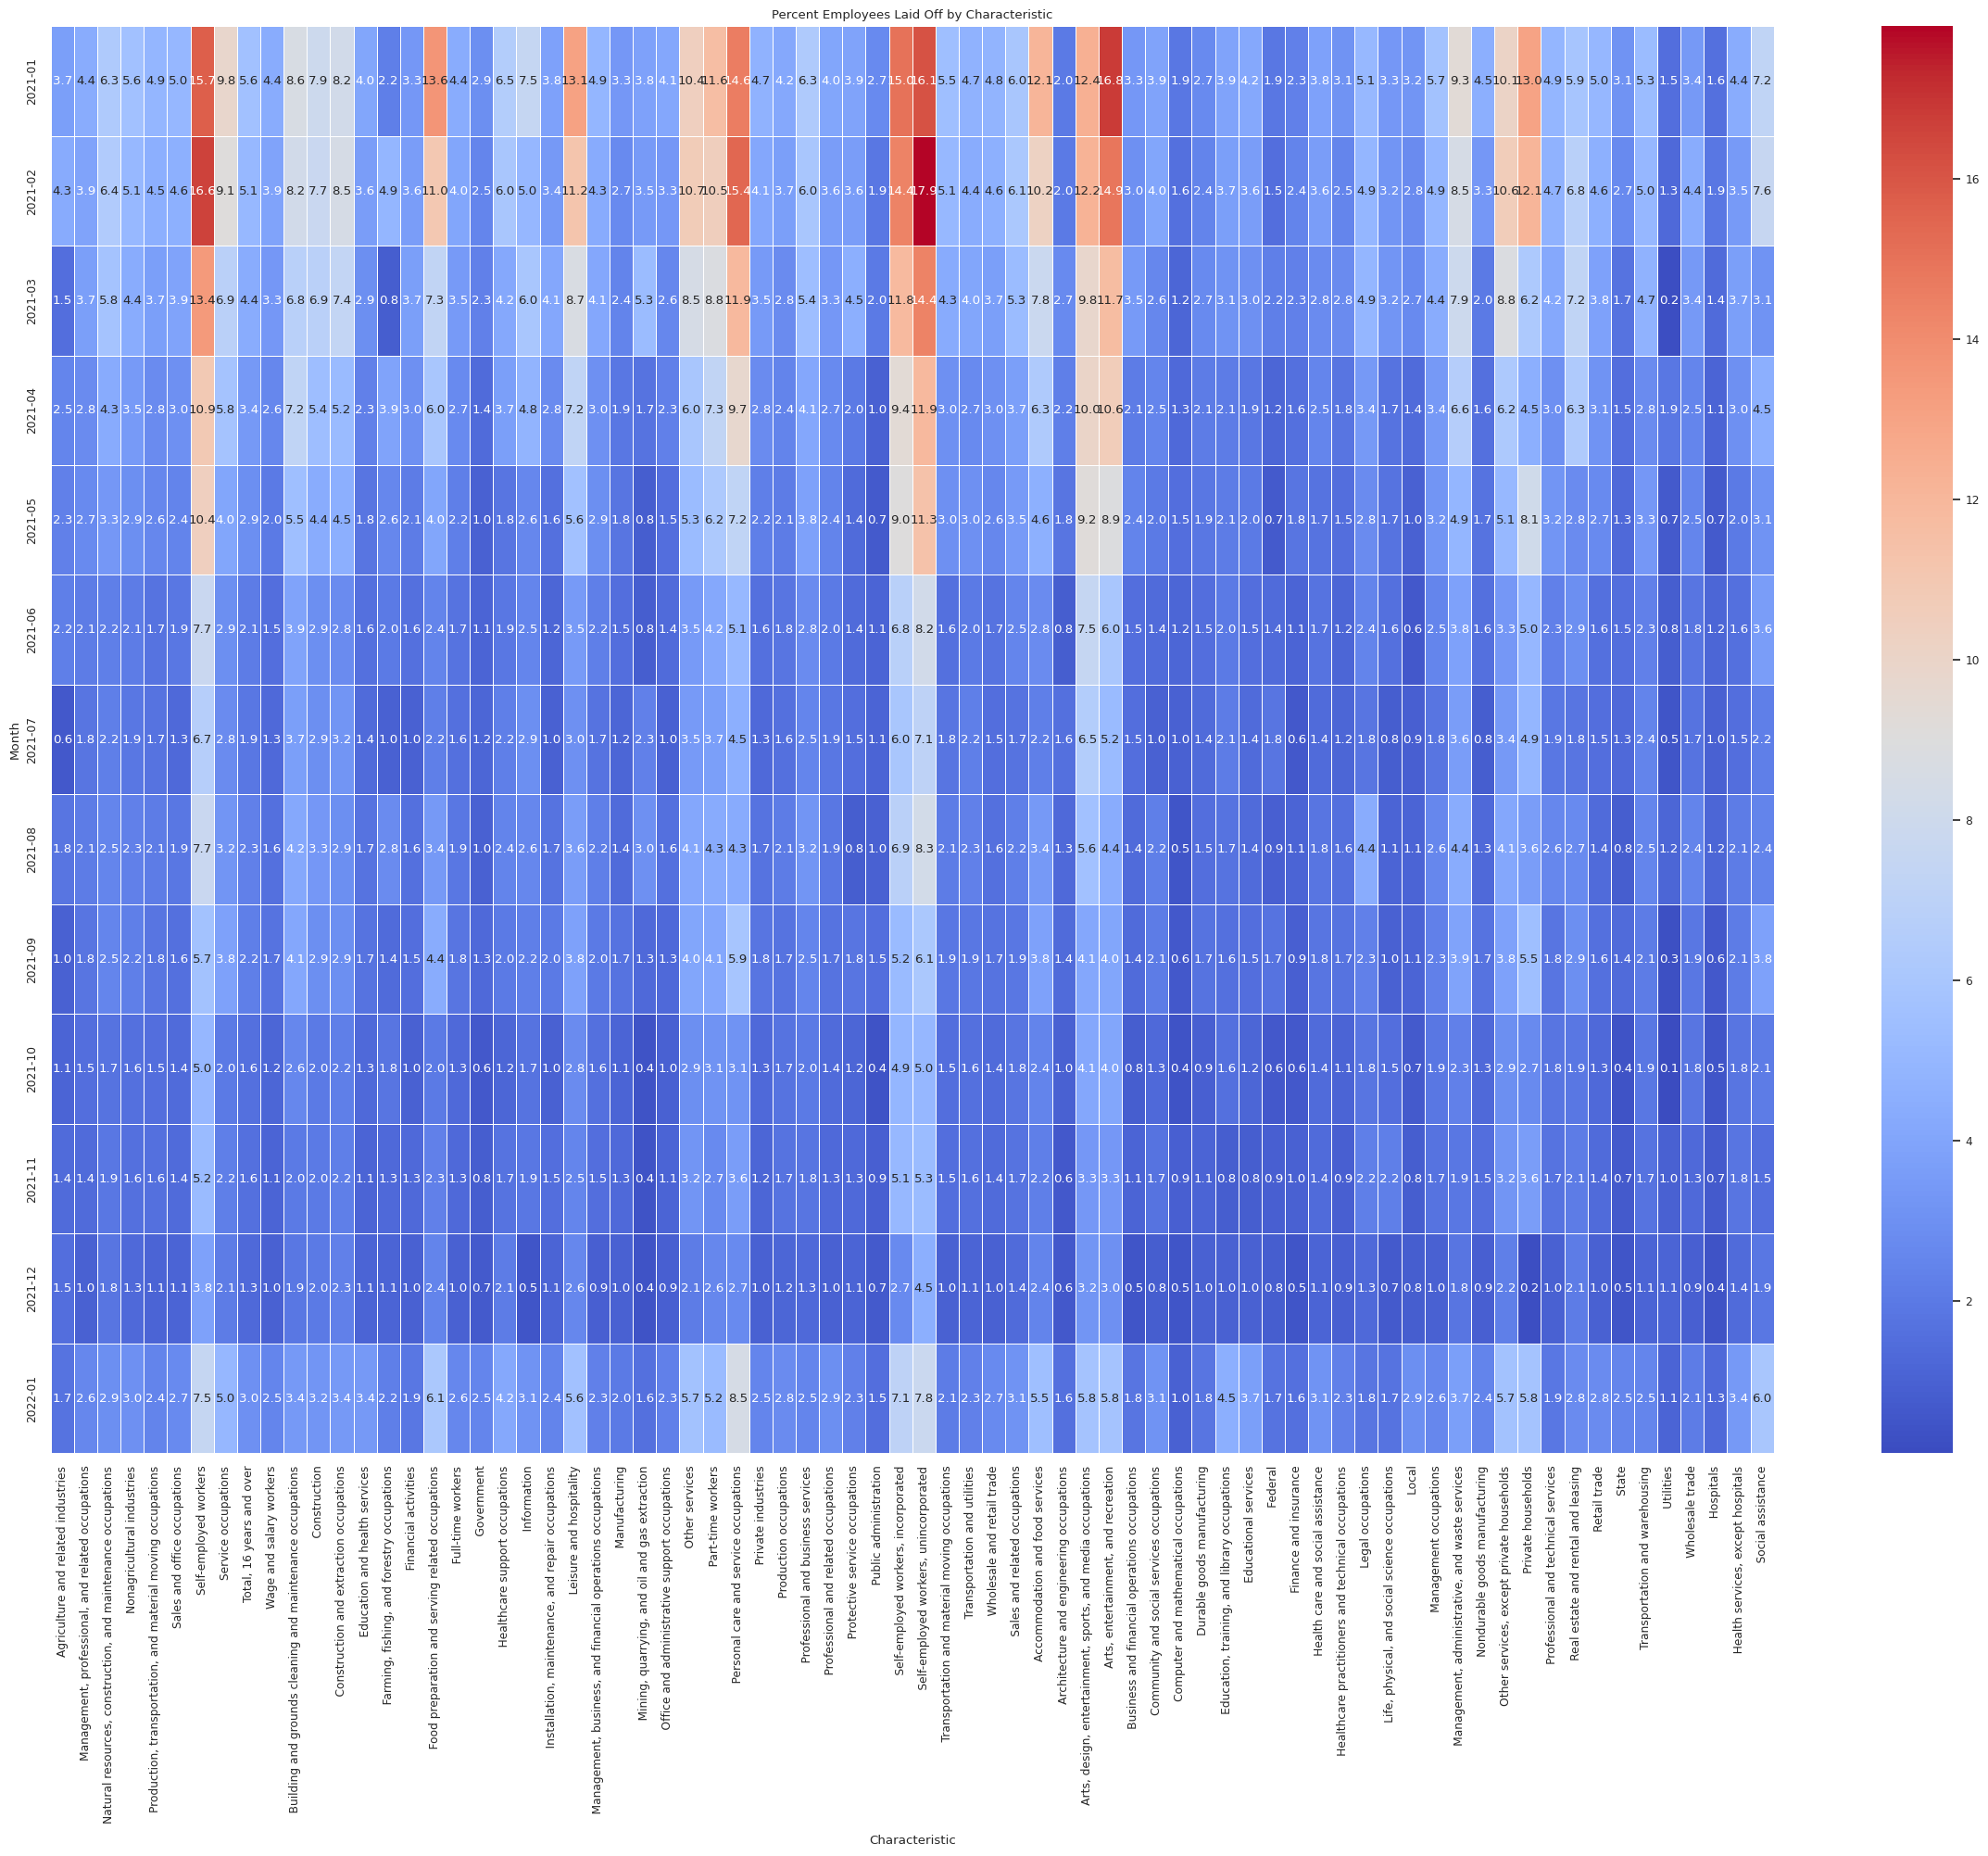

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pivot table
table = pd.pivot_table(df, values='PercentEmpLaidOff', index=['Month'], columns=['Characteristic'])

# Create heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.4)
plt.title('Percent Employees Laid Off by Characteristic')
plt.show()


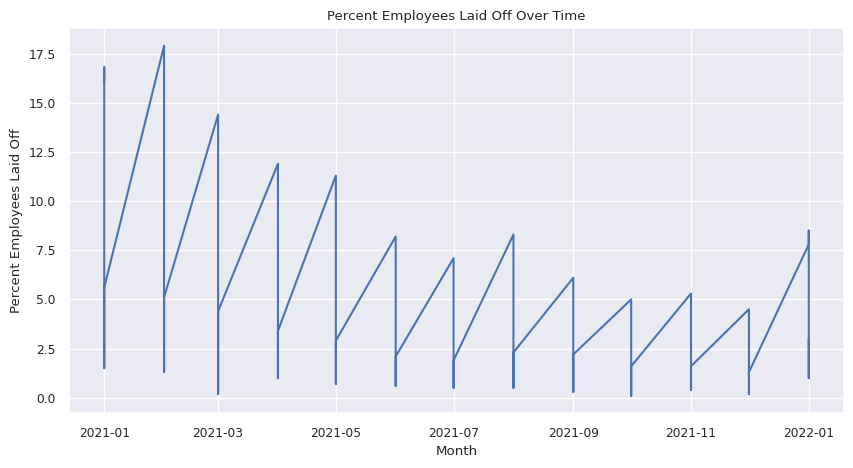

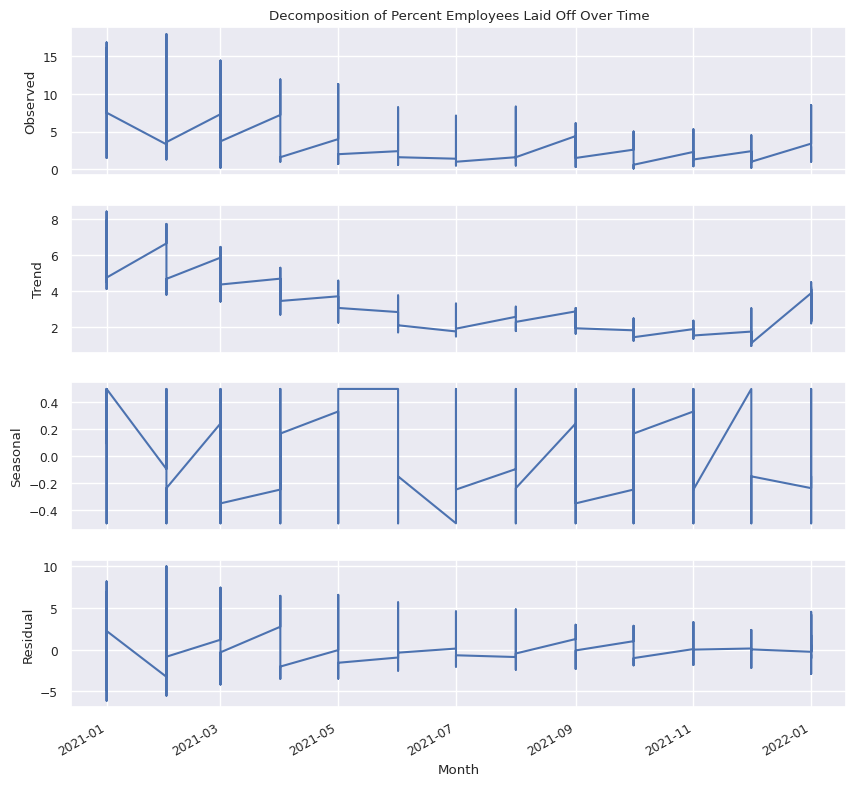

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



# Convert 'Month' column to datetime format and set as index
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

# Plot time series of PercentEmpLaidOff by Month
plt.figure(figsize=(10, 5))
plt.plot(df['PercentEmpLaidOff'])
plt.title('Percent Employees Laid Off Over Time')
plt.xlabel('Month')
plt.ylabel('Percent Employees Laid Off')
plt.show()

# Decompose time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(df['PercentEmpLaidOff'], model='additive', period=12)

# Plot decomposed time series
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,10))
axes[0].set_title('Decomposition of Percent Employees Laid Off Over Time')
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.xlabel('Month')
plt.show()


heatmap that shows the percentage of employees laid off by characteristic for each month in the dataset. You can customize the plot by changing the parameters of the Seaborn heatmap function and the matplotlib figure function.

<ipython-input-40-7b37707b5c0f>:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  table = pd.pivot_table(df, values='NotReceivedPay', index=['Month'], columns=['Characteristic'])


ValueError: ignored

<Figure size 3000x2000 with 0 Axes>